# Lead Scoring Assignment - Logistic Regression

### Objective  :- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.


In [1]:
# Impoting Libraies need to carryout EDA

import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step - 1 Understand the Data and Cleaning of the Data 

#### Understand Basics in the Data sets

In [2]:
# Importing all datasets
lead_data = pd.read_csv("leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_data.iloc[:20,20:30]

,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City
0,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select
1,No,No,No,No,Ringing,NaN,No,No,Select,Select
2,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai
3,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai
4,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai
5,No,No,No,No,NaN,NaN,No,No,NaN,NaN
6,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai
7,No,No,No,No,NaN,NaN,No,No,NaN,NaN
8,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts
9,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai


## There are some cells with 'select' we have to replace these values with Nan.

In [4]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_data.shape

(9240, 37)

In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Check unique elements in the Data
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Check for Null objects
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
100*(lead_data.isnull().sum())/len(lead_data.index)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
lead_data = lead_data.replace('Select', np.nan)

# Replacing 'Select' with NaN (Since it means no option is selected)

In [11]:
100*(lead_data.isnull().sum())/len(lead_data.index)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
# check for any duplicates in the Data Set.

lead_data_dup = lead_data

# Checking for duplicates and dropping the entire duplicate row if any
lead_data_dup.drop_duplicates(subset=None, inplace=True)
lead_data_dup.shape

(9240, 37)

In [13]:
# check for any duplicates in the Data Set.

lead_data_dup = lead_data

# Checking for duplicates and dropping the entire duplicate row if any
lead_data_dup.drop_duplicates(subset='Prospect ID', inplace=True)
lead_data_dup.shape

(9240, 37)

In [14]:
lead_data.duplicated().sum()

0

### Looking into above consideration, There are no duplicates in the Data

### Dropping column with Null values more than 40%

In [15]:
col=lead_data.columns

for i in col:
    if((100*(lead_data[i].isnull().sum()/len(lead_data.index))) >= 40):
        lead_data.drop(i,1,inplace=True)

In [16]:
lead_data.shape

(9240, 30)

In [17]:
# Checking the Columns available after dropping, Thus five columns are dropped.
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Creating function to plot the countplot and value counts to replace Null values

In [19]:
def check(cols):
    plt.figure(figsize=(15,5))
    ax=sns.countplot(data=lead_data,x=cols,hue=lead_data['Converted']) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()
    return lead_data[cols].value_counts(dropna=False)

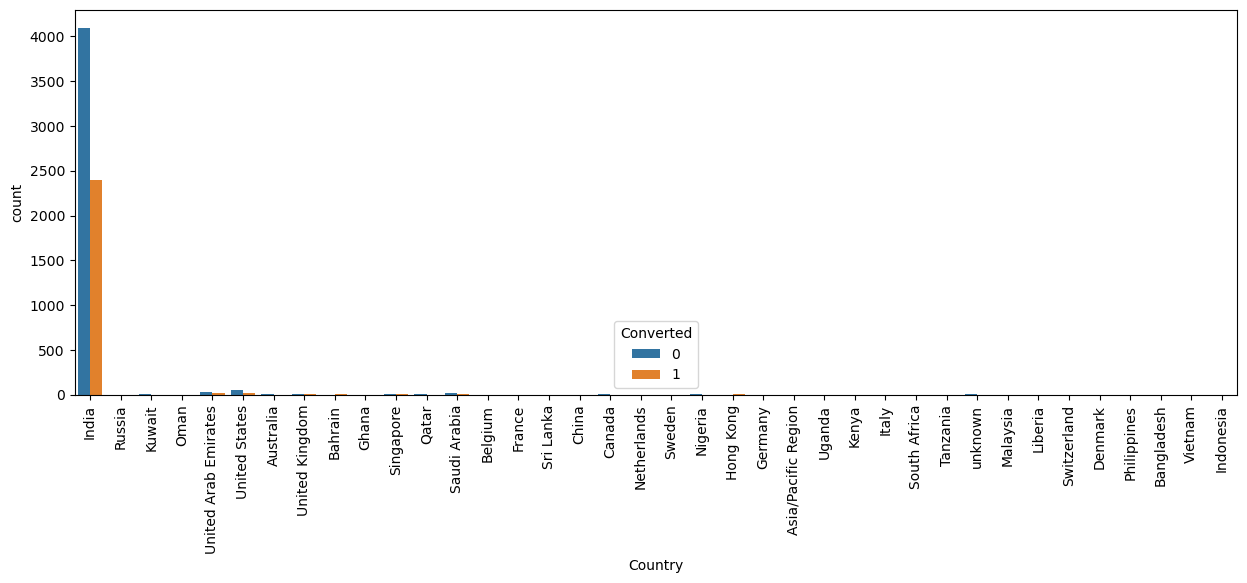

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [20]:
check('Country')

In [21]:
lead_data['Country'] = lead_data['Country'].replace(np.nan,'India')

# Replacing Nan values to India as it is most repeated.

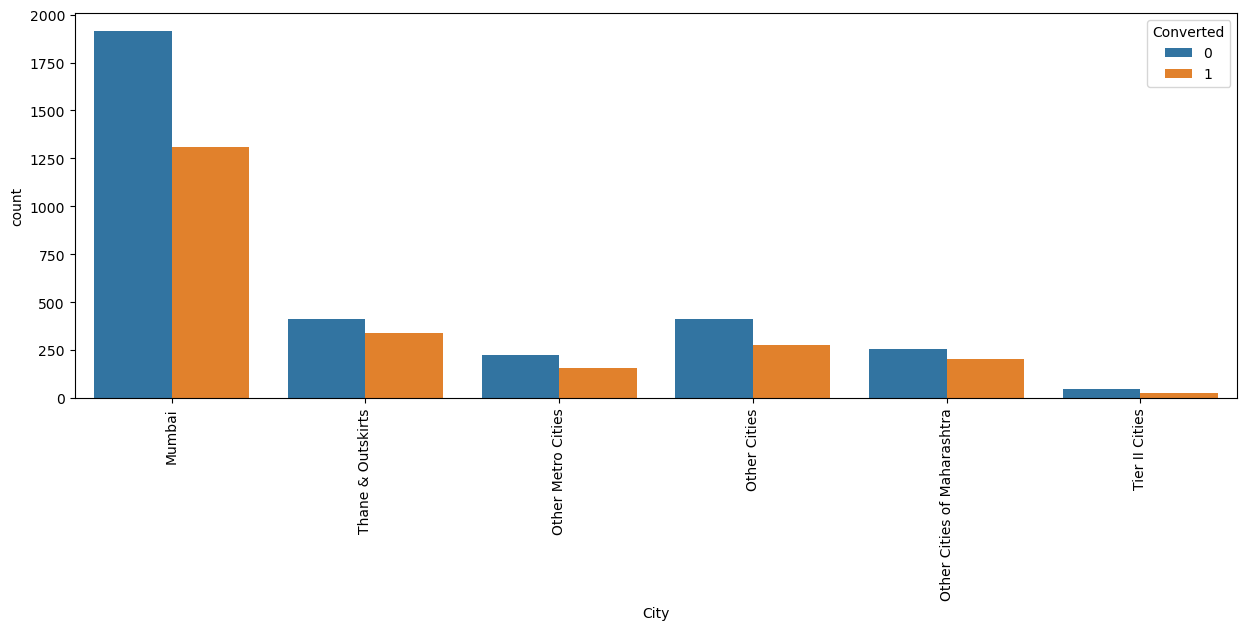

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
check('City')

In [23]:
lead_data['City'] = lead_data['City'].replace(np.nan,'Mumbai')

# Replacing Nan values to Mumbai as it is most repeated.

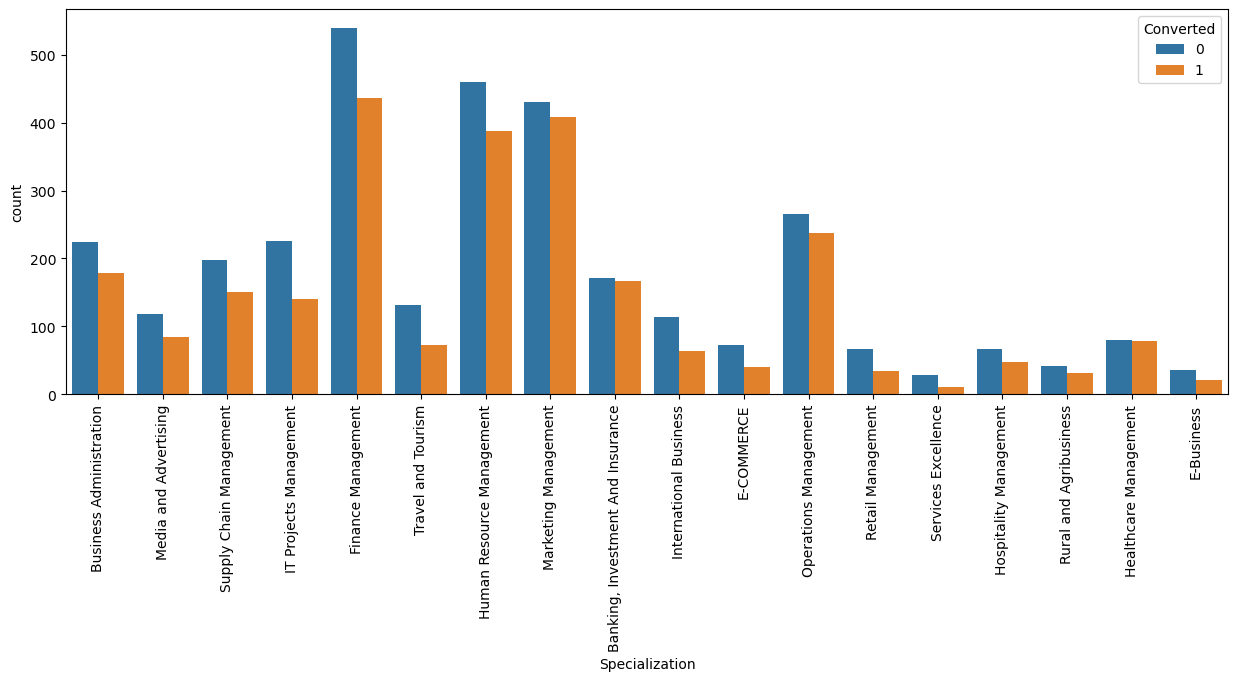

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
check('Specialization')

### As some data entry in specialization column is due to may be student or not available. We can replace it to "not specified".

In [25]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan,'Not Specified')

# Replacing Nan values to "Not Specifed" as we do not know them they could be studuents or not specified.

### We see there are many columns with specialization we can replace those with single name as Management Specilaization. Just for ease fo reducing the data understanding

In [26]:
lead_data['Specialization'] = lead_data['Specialization'].replace(['Retail Management','Healthcare Management','Hospitality Management','Supply Chain Management','IT Projects Management','Operations Management','Marketing Management','Human Resource Management','Finance Management'],'Management_Specialization')

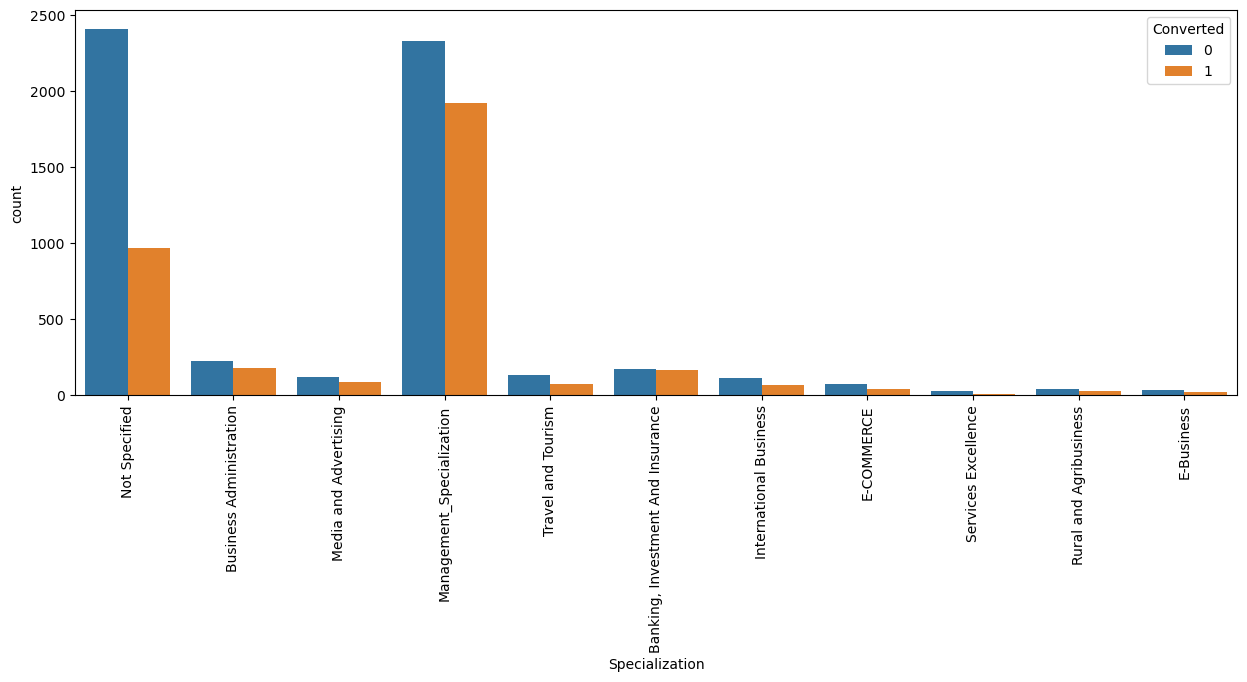

Management_Specialization            4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
check('Specialization')

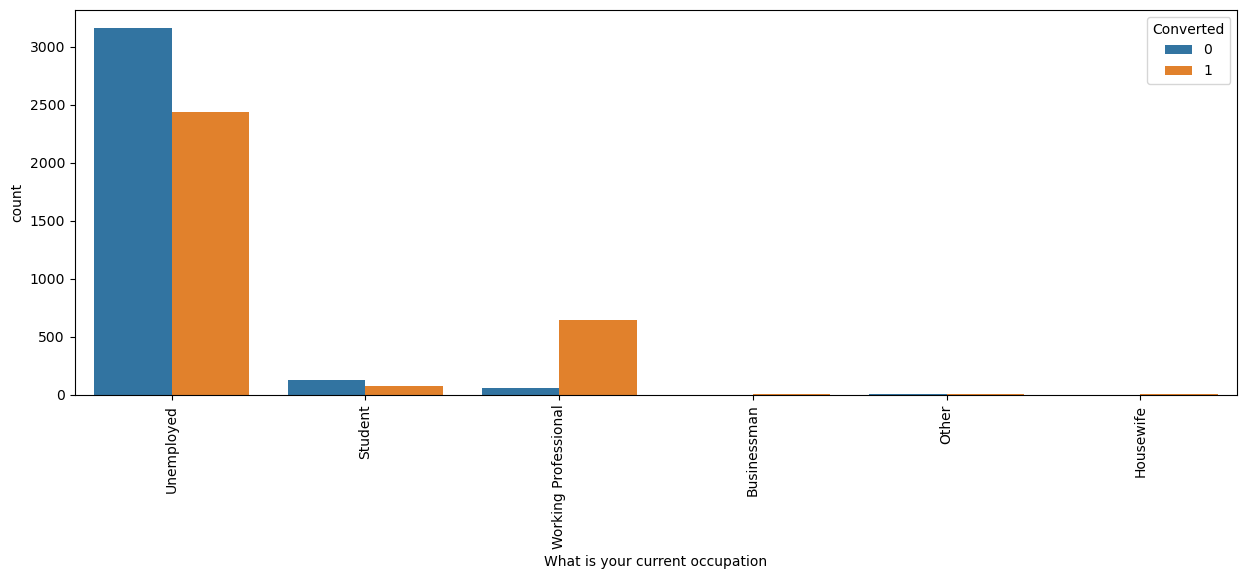

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
check('What is your current occupation')

In [29]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan,'Unemployed')


# Replacing Nan values to "Unemployed" as we do not know them they could be studuents or unemployed.

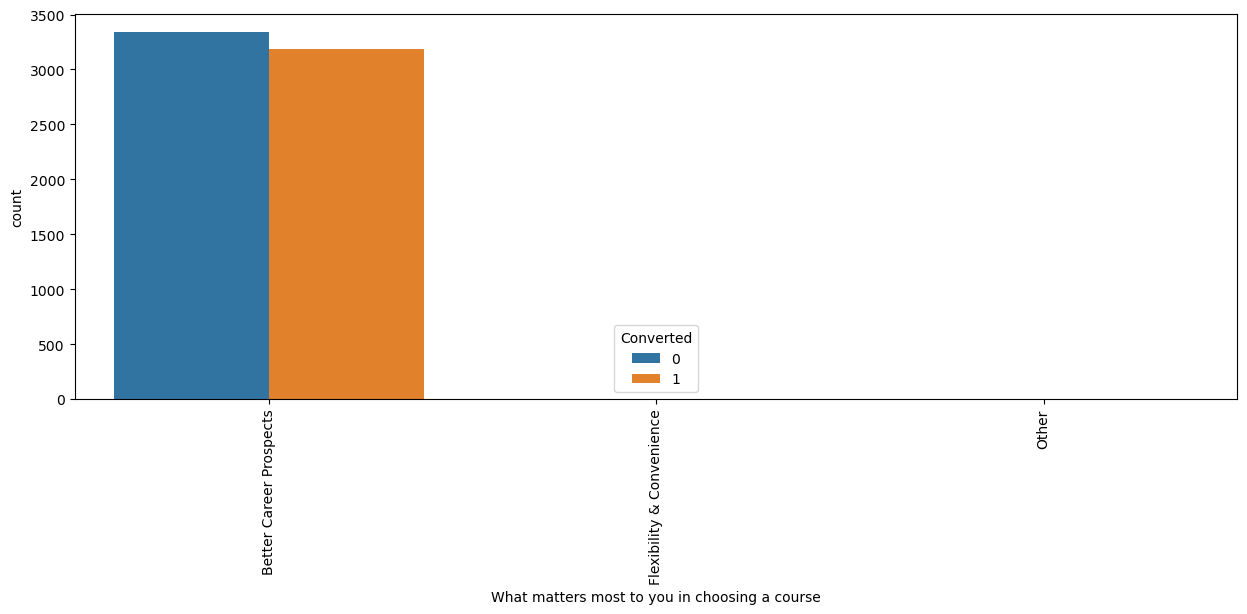

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
check('What matters most to you in choosing a course')

In [31]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

# Replacing Nan values to "BEtter Career Prospects" as we do not know them they could be studuents or not specified.

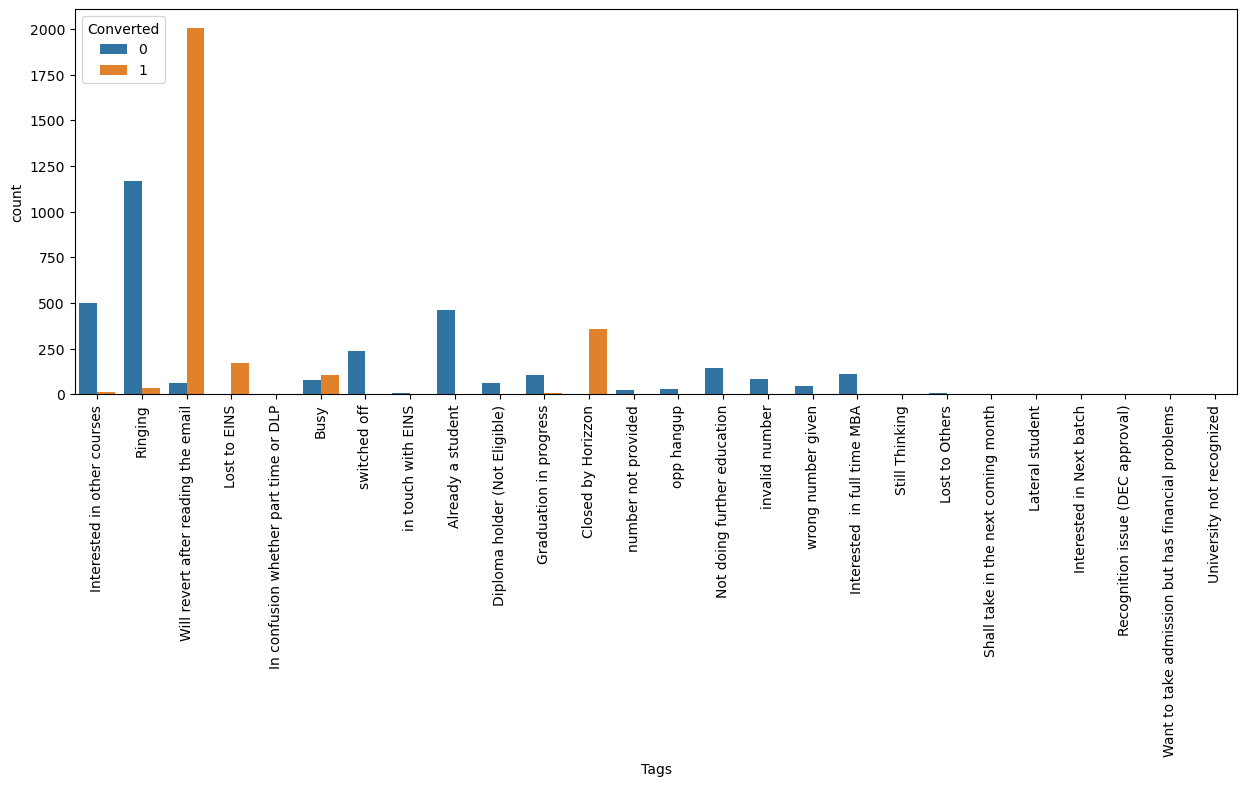

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [32]:
check('Tags')

In [33]:
lead_data['Tags'] = lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

# Replacing Nan values to "will revert after email" as we do not know.

We can drop the Tags Column

In [34]:
lead_data['Tags'] = lead_data['Tags'].replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month','Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking'] , 'Other_Tags')

# Replacing lower frequency Tags to Other_Tags

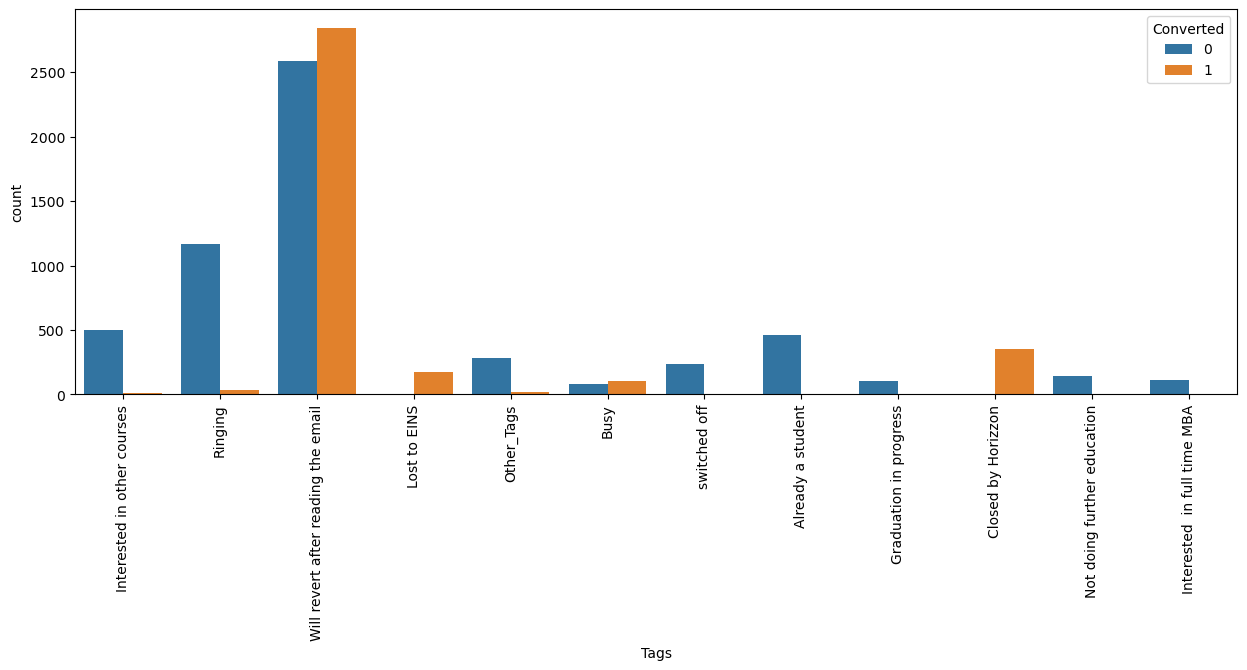

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other_Tags                              302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [35]:
check('Tags')

### People who says will revert after reading mail has more conversion rate. 

### Checking the Data with null values and percentage.

In [36]:
100*(lead_data.isnull().sum())/len(lead_data.index)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [37]:
lead_data.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

## Thus we cleared most of the replaced the Null values with most value in respective columns. We can see above there are no more null values in the Data. 

## Look for other Variables to reduce minimal categories to others.

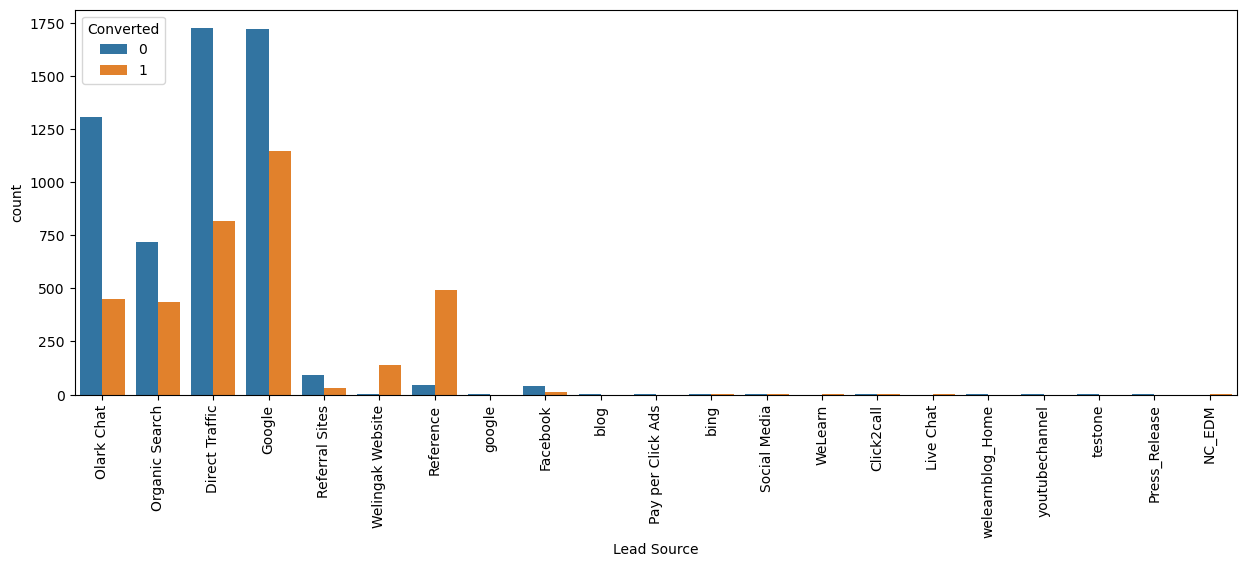

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
check('Lead Source')

In [39]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['NC_EDM','blog', 'WeLearn', 'welearnblog_Home','Pay per Click Ads','testone','youtubechannel','Live Chat','Social Media','Press_Release','Click2call','bing',np.nan],'Others')

In [40]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Facebook', 'Social Media')

In [41]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace("google", 'Google')

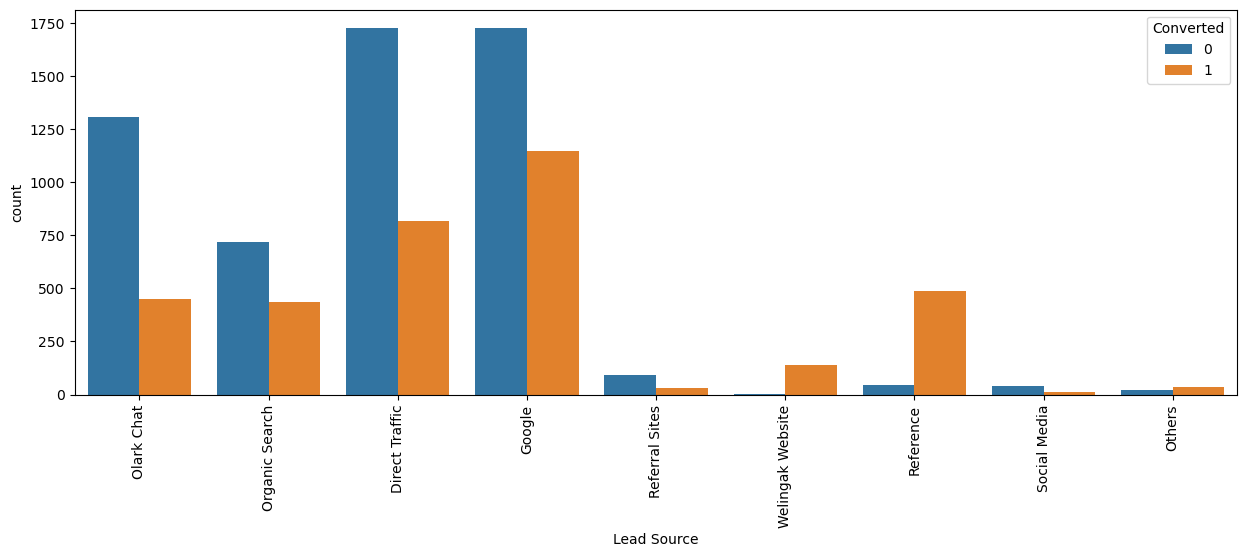

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Social Media          55
Name: Lead Source, dtype: int64

In [42]:
check('Lead Source')

### Maximum Number of leads are from direct traffic and Google
### Conversion rate from welingak website is high
### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [43]:
#Check unique elements in the Data
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     11
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

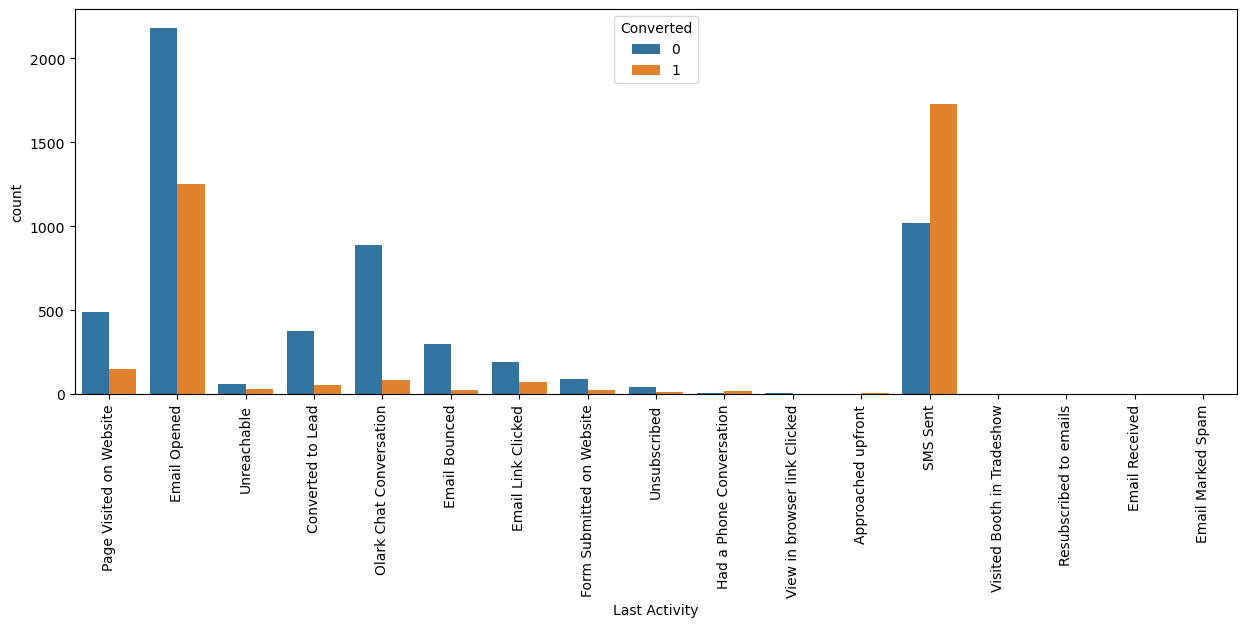

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
check('Last Activity')

In [45]:

lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan,'Others')
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

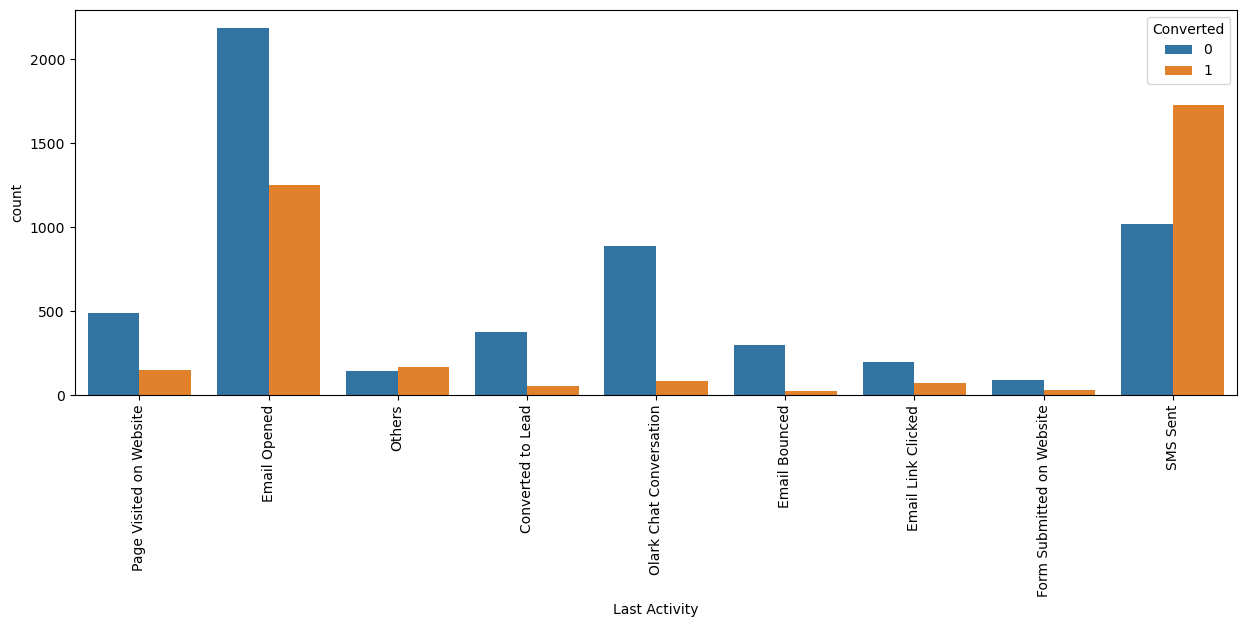

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [46]:
check('Last Activity')

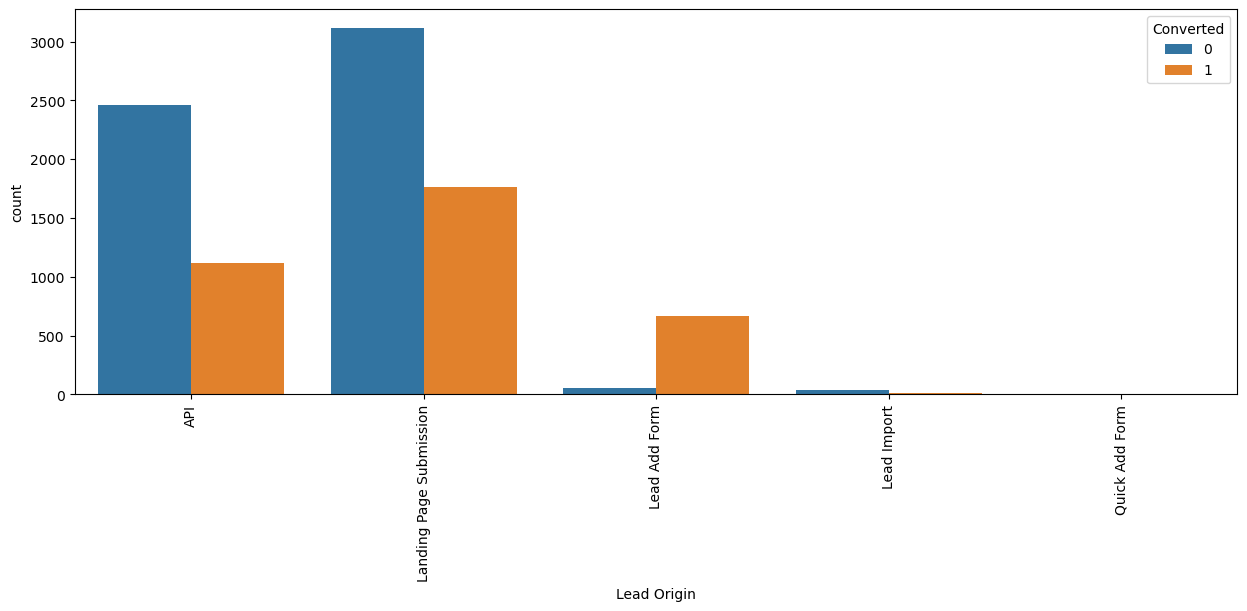

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [47]:
check('Lead Origin')

### API and Landing Page has more number of Leads and conversion rate. We need to work on and improve these origin.
### Lead Add Form has high conversion rate but count is less.
### We need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form to improve.

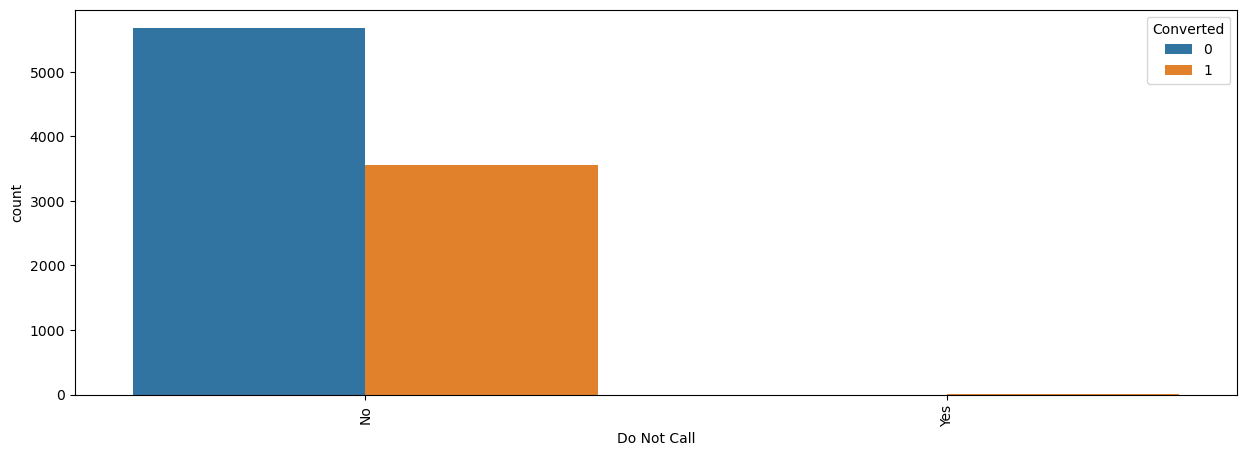

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [48]:
check('Do Not Call')

## Check for imbalance Data and Deleting/Dropping those columns

In [49]:
lead_data.drop('Do Not Call',1,inplace=True)

### Most people do not prefer to call and conversion is also less, people who prefer to call does not have any conversion.

### This is highly imbalanced variable we can drop this columns. Lets check imbalanced columns and Drop those columns.


In [50]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9240 

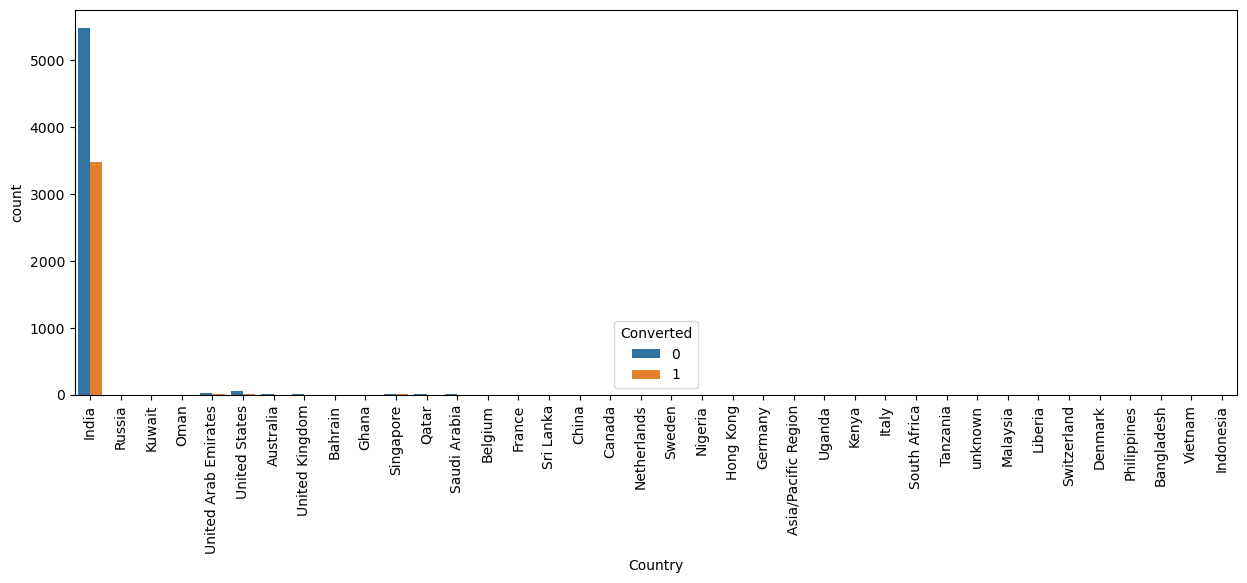

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [51]:
check('Country')

In [52]:
lead_data.drop('Country',1,inplace=True)


## As we see India has more that 97% data it is highly imbalanced, we can drop country column.

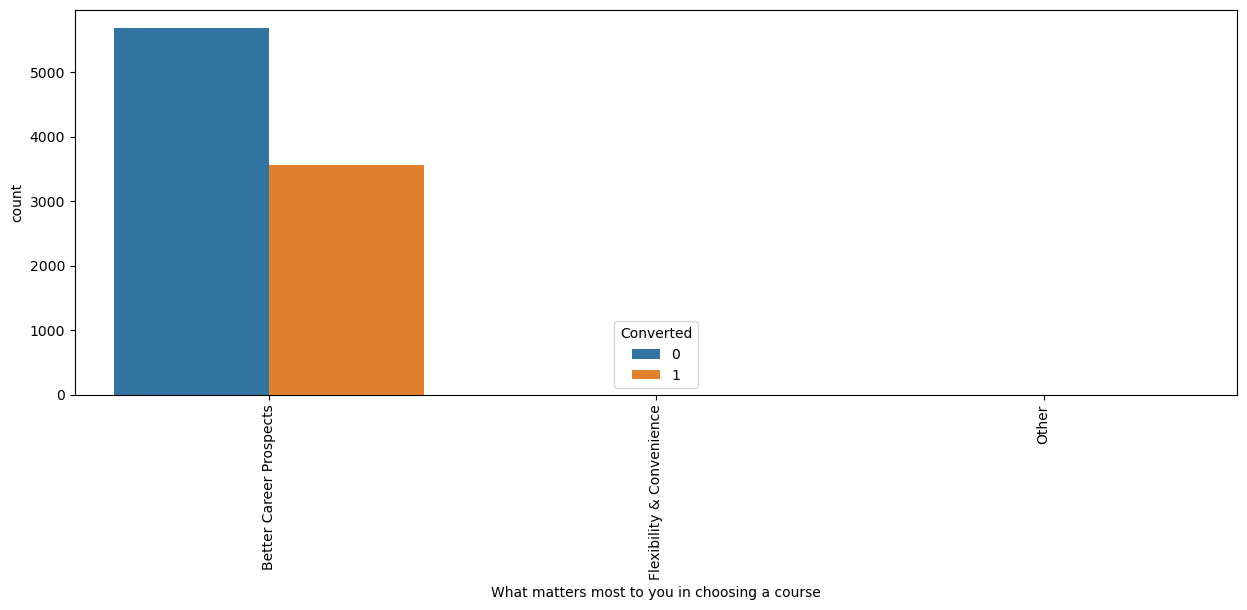

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [53]:
check('What matters most to you in choosing a course')

In [54]:
lead_data.drop('What matters most to you in choosing a course',1,inplace=True)

### As we see "What matters most to you in choosing a course" has more that 98% data it is highly imbalanced, we can drop this column.

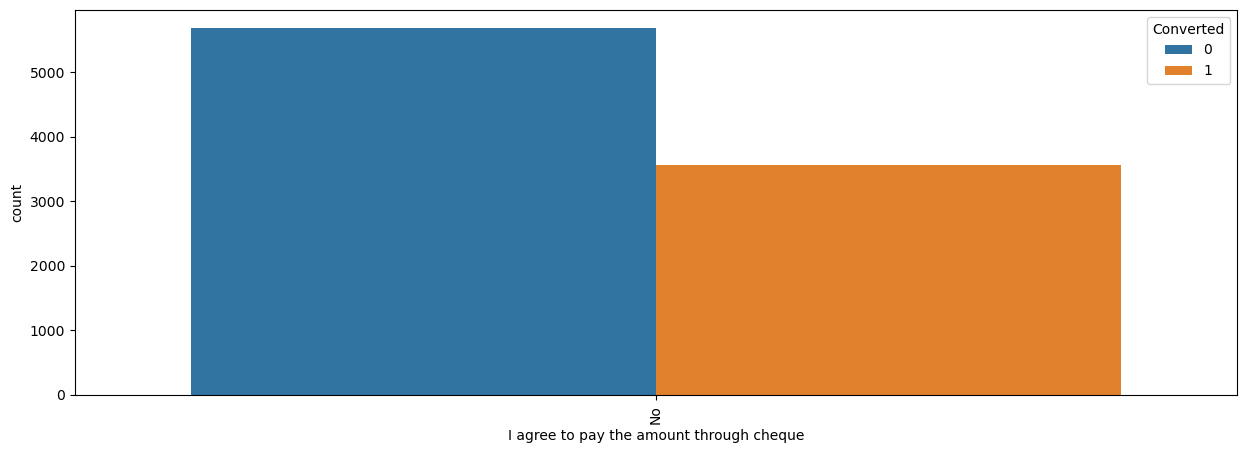

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [55]:
check('I agree to pay the amount through cheque')

In [56]:
lead_data.drop('I agree to pay the amount through cheque',1,inplace=True)

# Dropping this columns

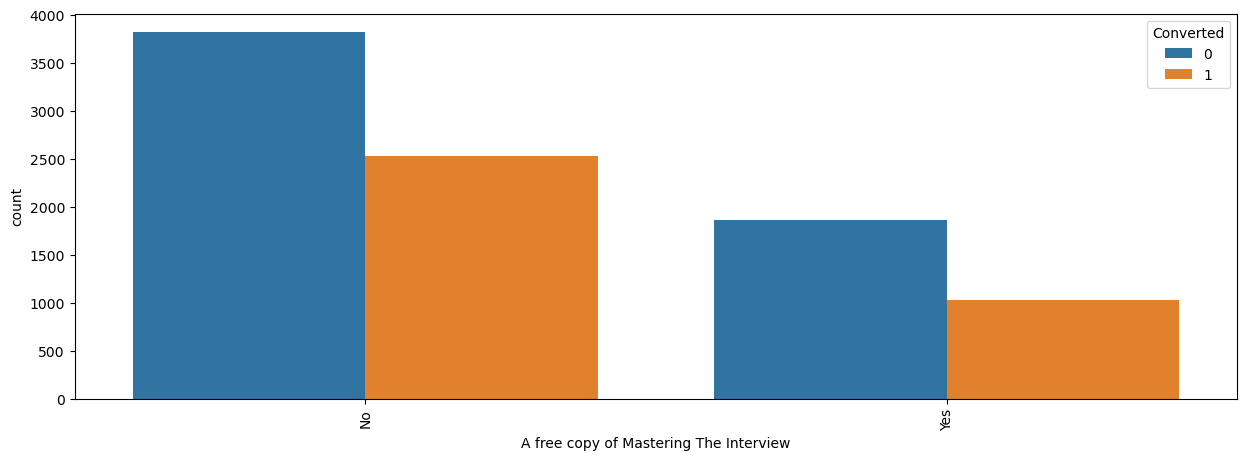

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [57]:
check('A free copy of Mastering The Interview')

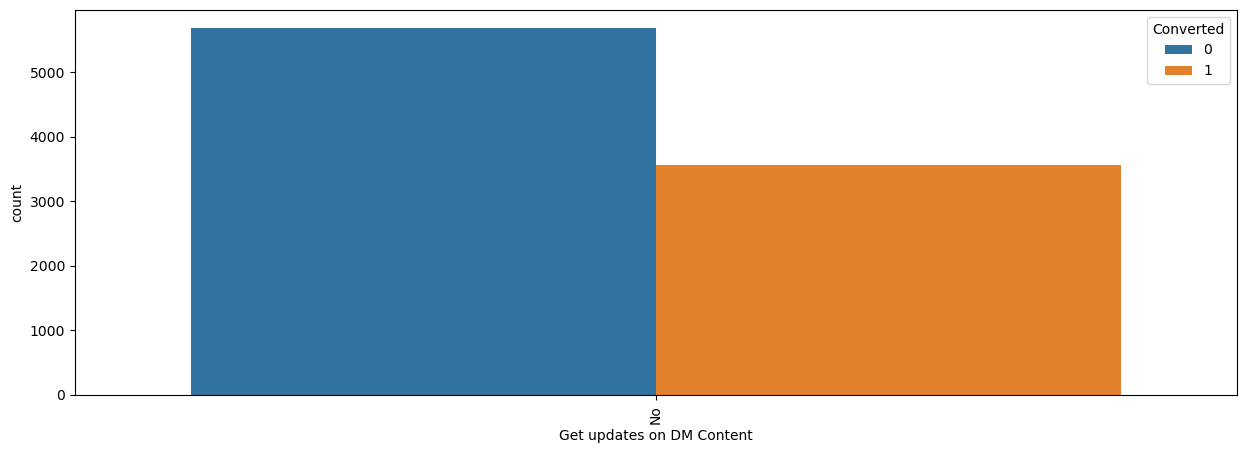

No    9240
Name: Get updates on DM Content, dtype: int64

In [58]:
check('Get updates on DM Content')

In [59]:
lead_data.drop('Get updates on DM Content',1,inplace=True)

### As we see "Get updates on DM Content" has more that 98% data it is highly imbalanced, we can drop this column.

In [60]:
lead_data.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                                9
Specialization                              11
What is your current occupation              6
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Tags                                        12
Update me on 

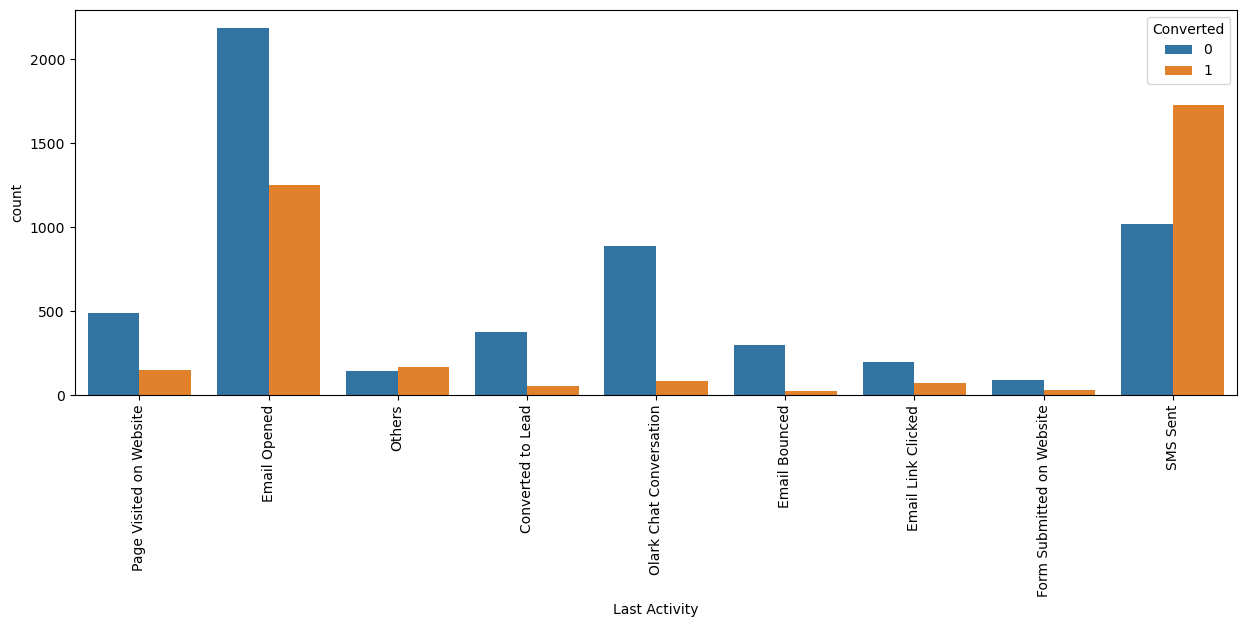

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [61]:
check("Last Activity")

In [62]:
Col_drop=[]

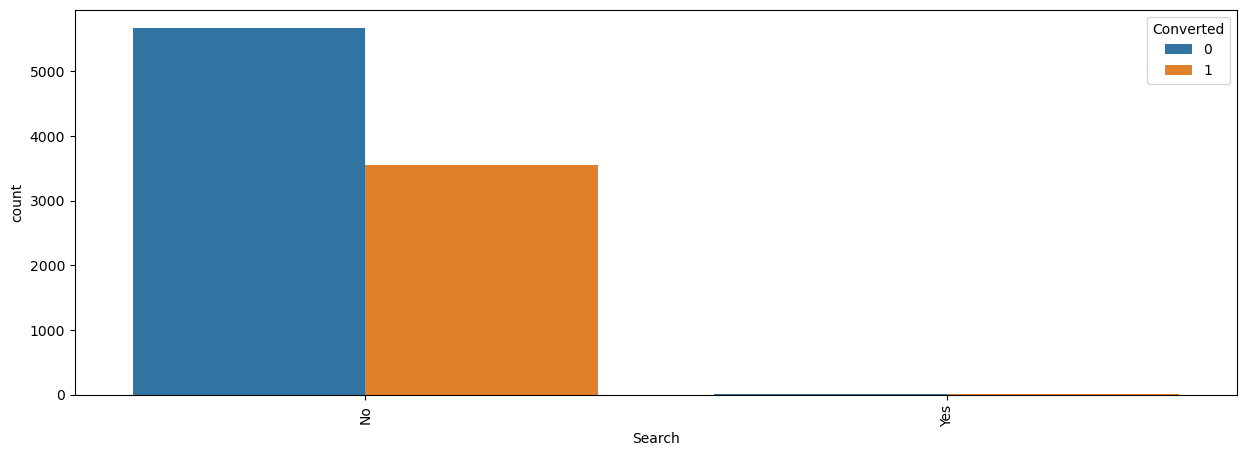

No     9226
Yes      14
Name: Search, dtype: int64

In [63]:
check('Search')

In [64]:
Col_drop.append('Search')

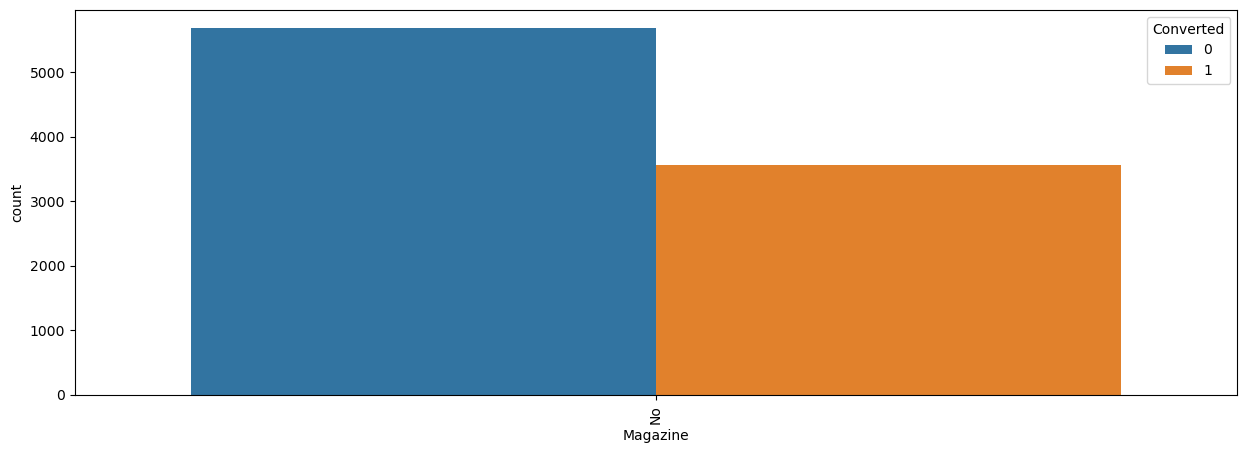

No    9240
Name: Magazine, dtype: int64

In [65]:
check('Magazine')

In [66]:
Col_drop.append('Magazine')

In [67]:
print(Col_drop)

['Search', 'Magazine']


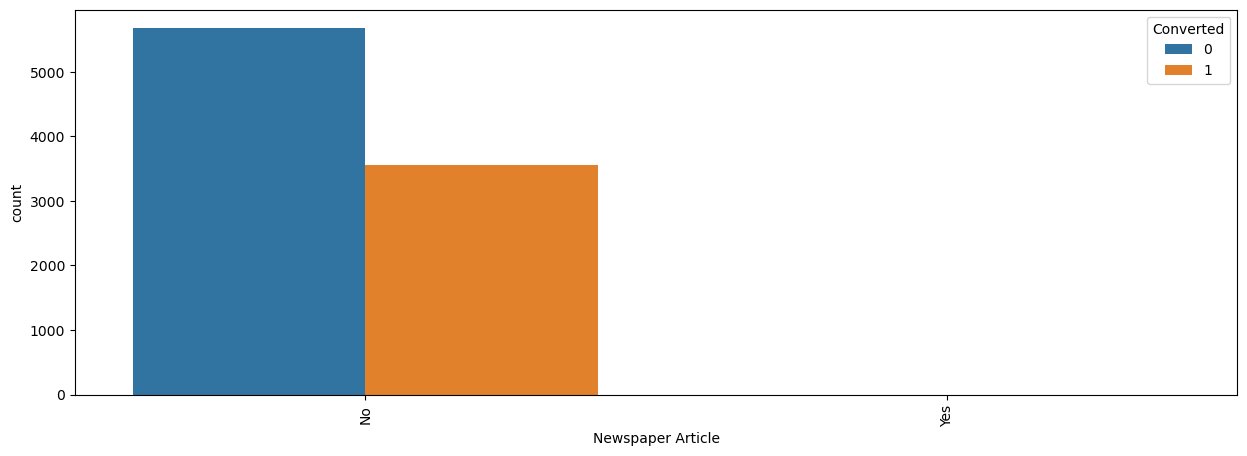

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [68]:
check('Newspaper Article')

In [69]:
Col_drop.append('Newspaper Article')

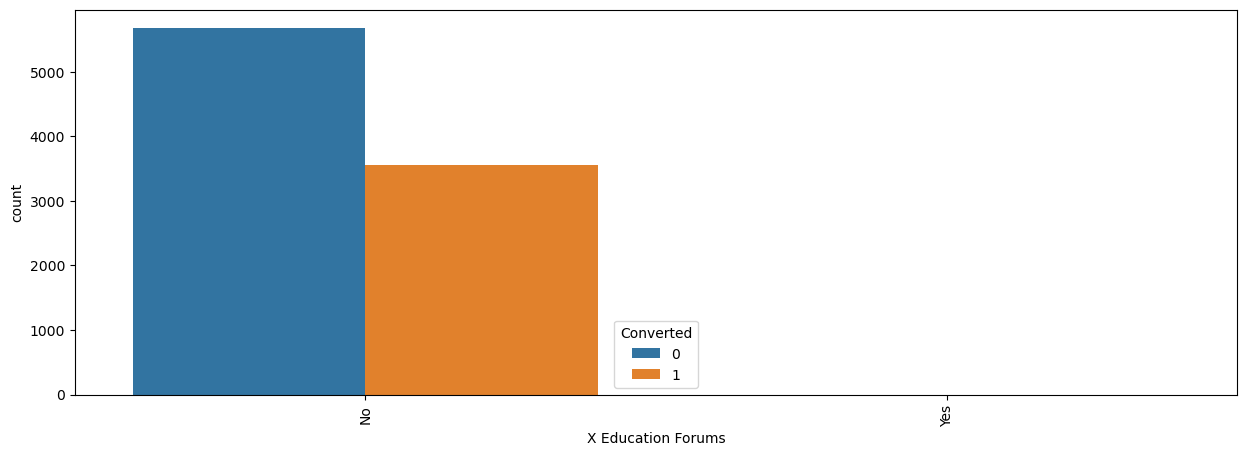

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [70]:
check('X Education Forums')

In [71]:
Col_drop.append('X Education Forums')

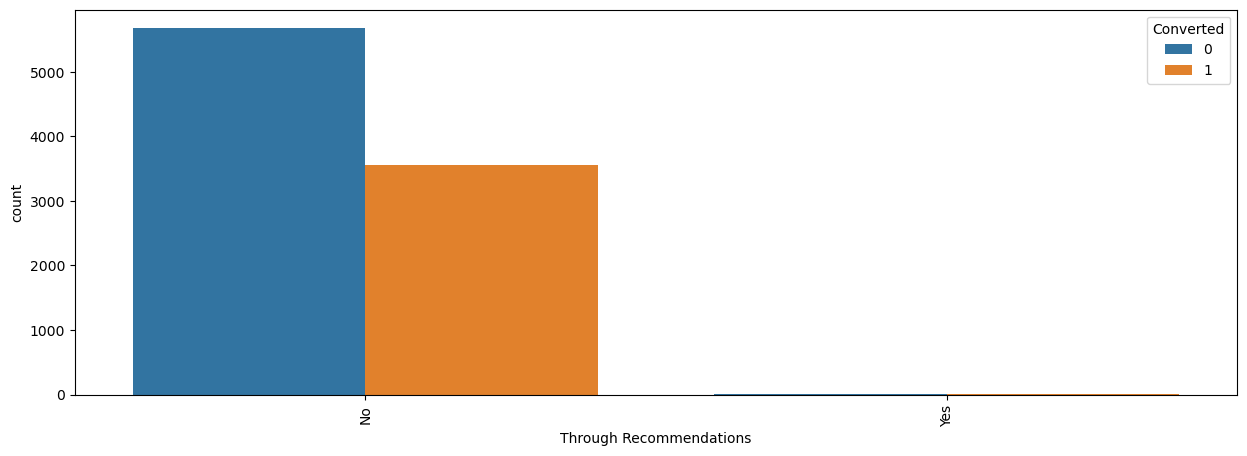

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [72]:
check('Through Recommendations')

In [73]:
Col_drop.append('Through Recommendations')

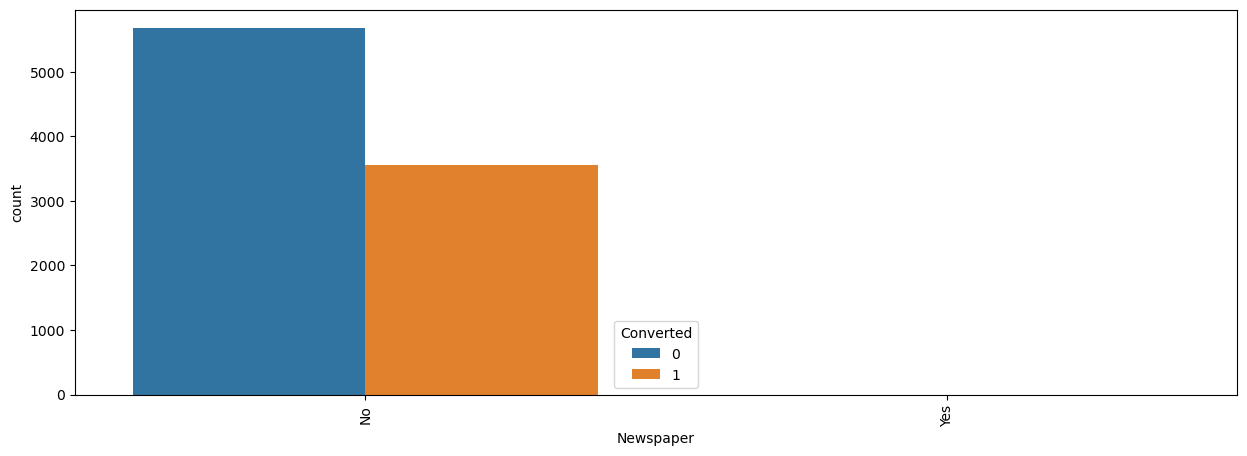

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [74]:
check('Newspaper')

In [75]:
Col_drop.append('Newspaper')

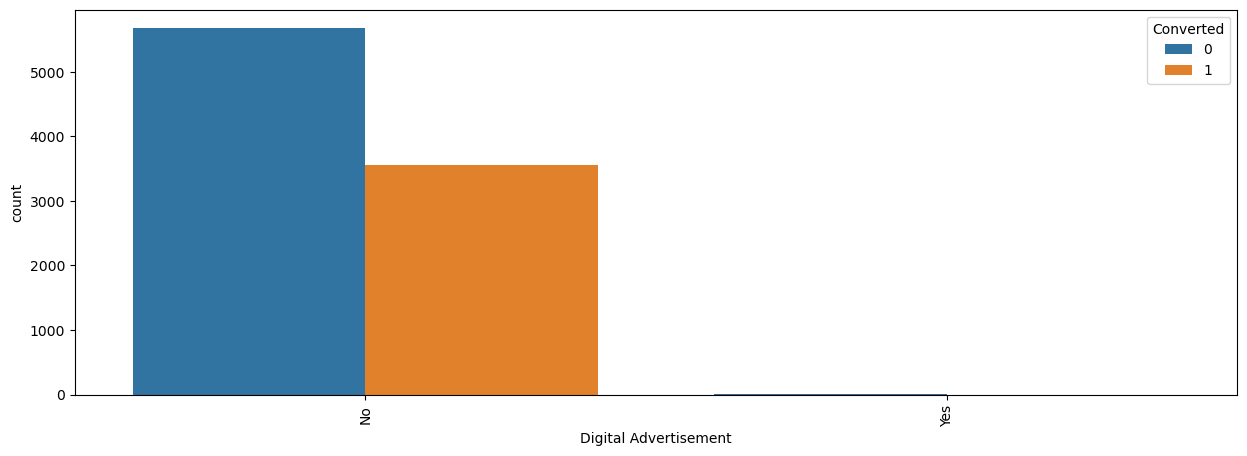

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [76]:
check('Digital Advertisement')

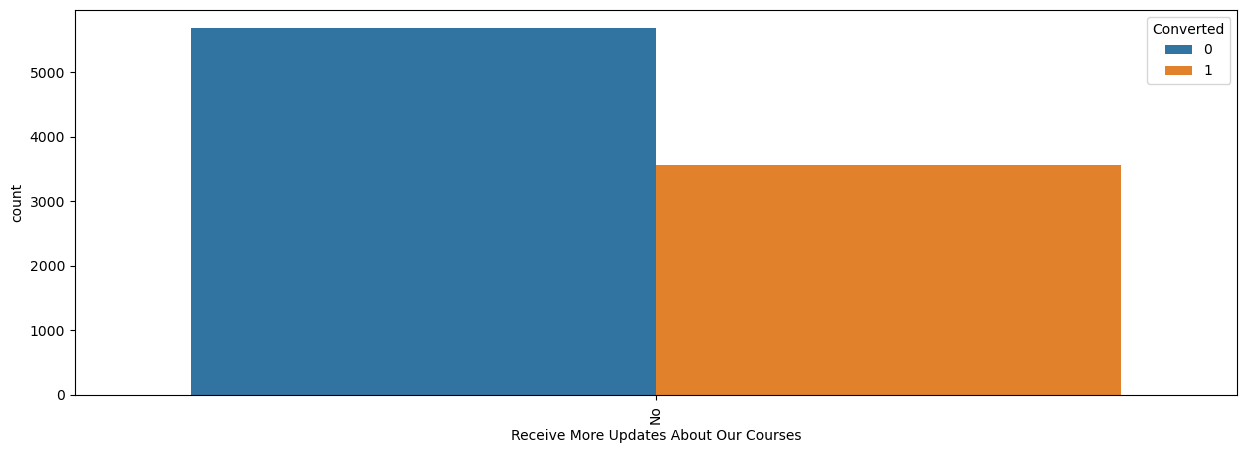

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [77]:
check('Receive More Updates About Our Courses')

In [78]:
Col_drop.append('Receive More Updates About Our Courses')

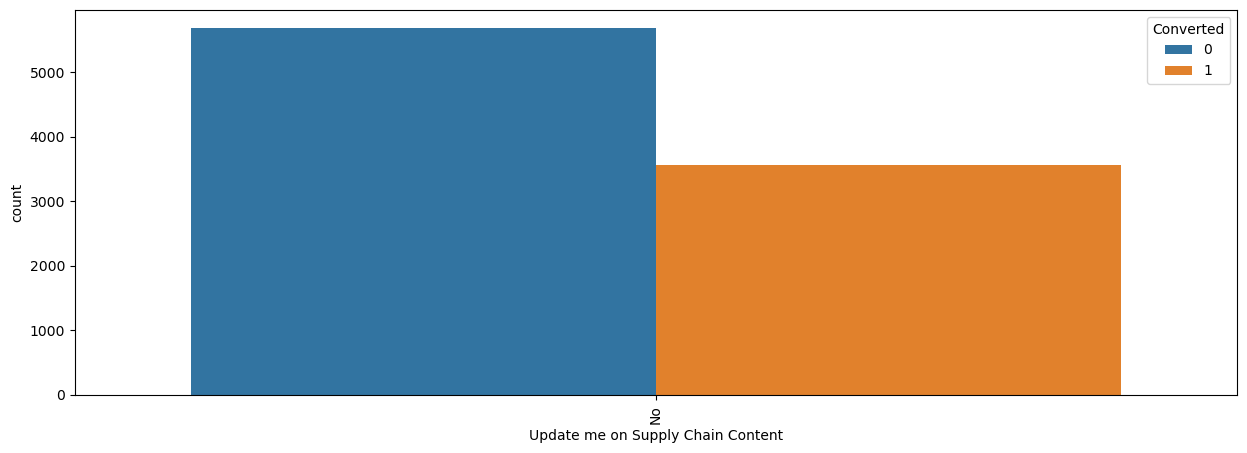

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [79]:
check('Update me on Supply Chain Content')

In [80]:
Col_drop.append('Update me on Supply Chain Content')

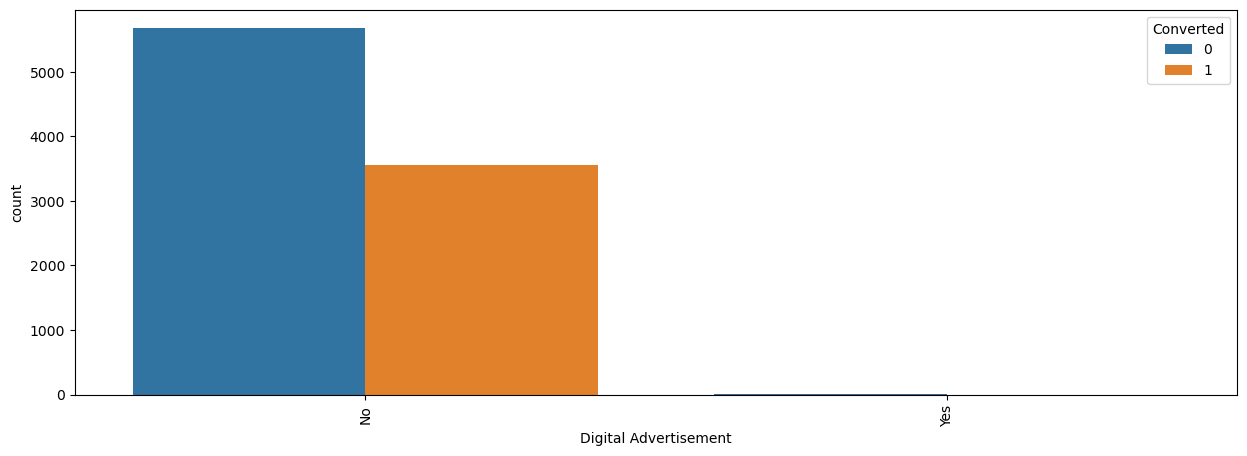

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [81]:
check('Digital Advertisement')

In [82]:
Col_drop.append('Digital Advertisement')

In [83]:
lead_data = lead_data.drop(Col_drop,1)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

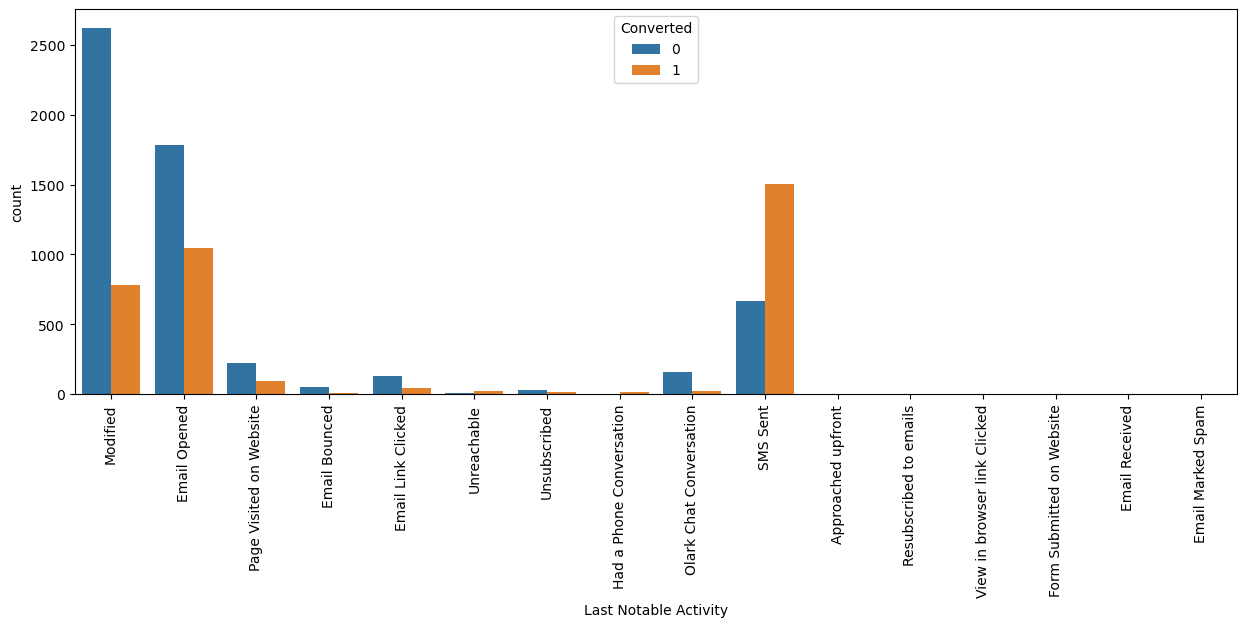

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [84]:
check('Last Notable Activity')

In [85]:
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activities')

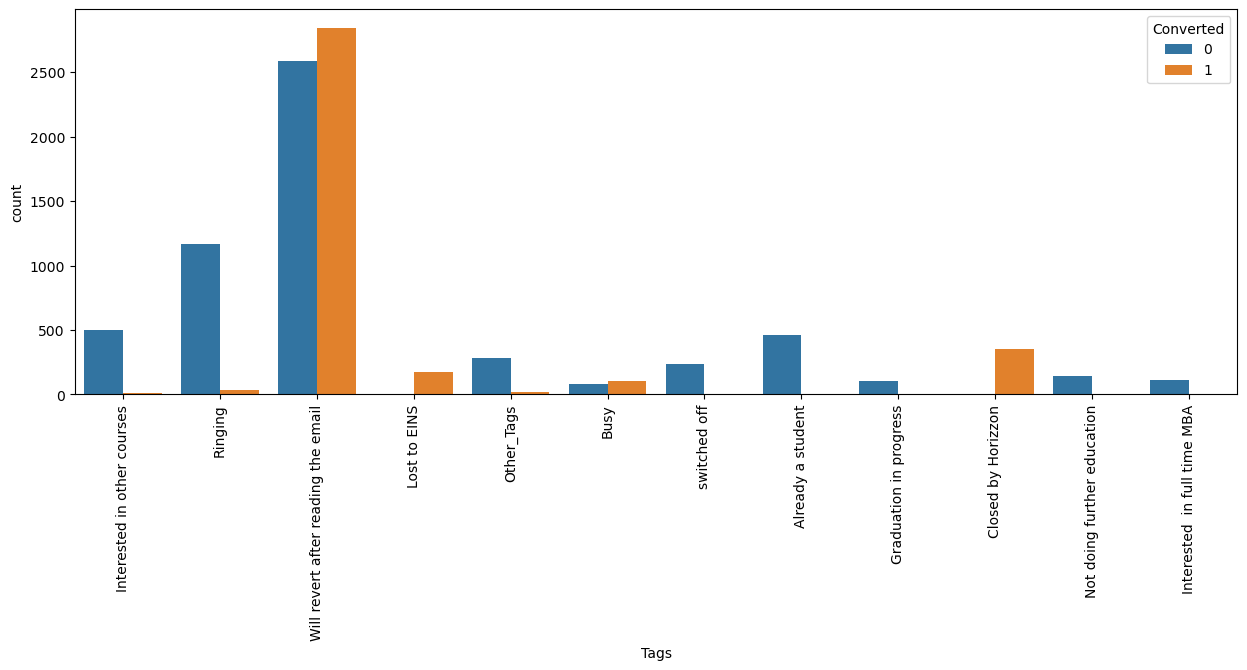

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other_Tags                              302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [86]:
check('Tags')

In [87]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [88]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)


Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [89]:
lead_data = lead_data.dropna()

In [90]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [91]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

In [92]:
lead_data.head()
lead_data.shape

(9103, 16)

## We dropped some of the columns which were not needed due to imbalance in the data. We can drop "ProspectID "and "Lead Number" as these are unique values. 

In [93]:
lead_data.drop(['Prospect ID','Lead Number','Tags'],1,inplace=True)

In [94]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  City                                    9103 non-null   obje

# Step - 2  EDA for the Final_Data

In [95]:
lead_data_1=lead_data

<AxesSubplot:>

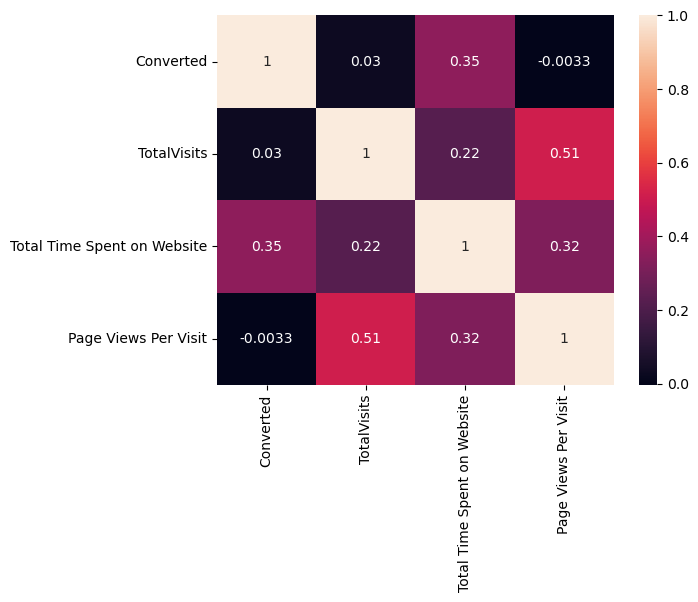

In [96]:
sns.heatmap(lead_data_1.corr(),annot=True)

## We can see here Total Visits - page per visits has high correlation. 

In [97]:
fin_col=lead_data_1.columns
print(fin_col)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')


In [98]:
def coun(cols):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)    
    ax=sns.countplot(data=lead_data,x=cols,hue=lead_data['Converted']) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    plt.subplot(1,2,2)
    
    ax=sns.countplot(data=lead_data,x=cols) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.show()
    print(lead_data[cols].value_counts(normalize=True, dropna=False))
    print(lead_data[cols].value_counts(dropna=False))


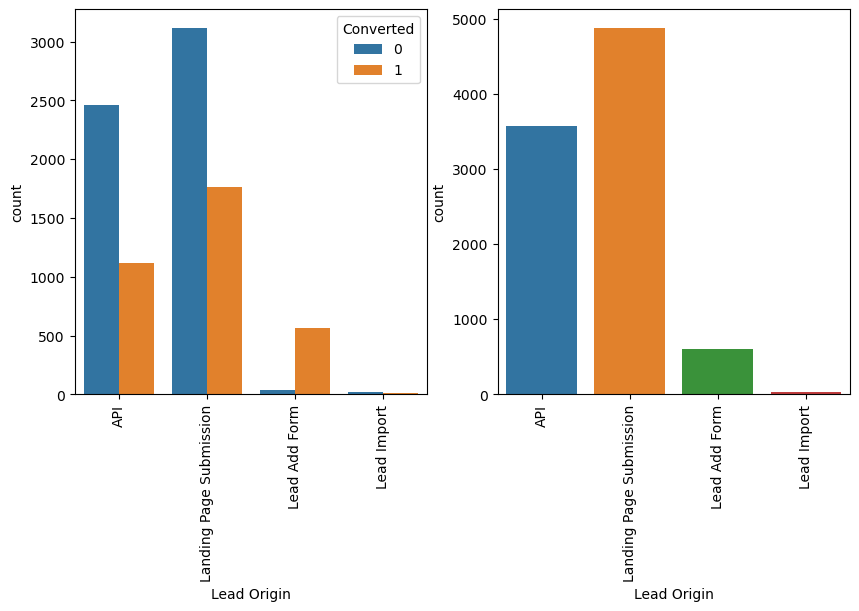

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64


In [99]:
coun('Lead Origin')

### API and Landing Page has more number of Leads and conversion rate. We need to work on and improve these origin.
### Lead Add Form has high conversion rate but count is less.
### We need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form to improve.

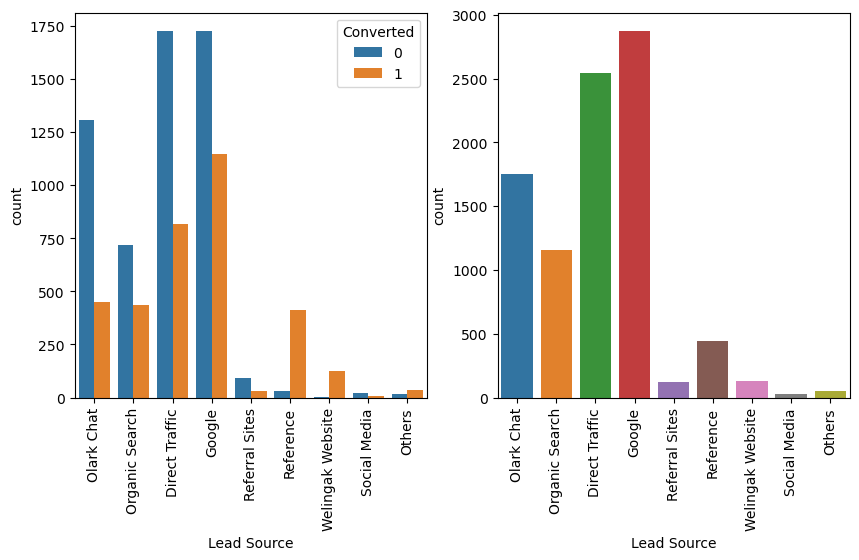

Google              0.315610
Direct Traffic      0.279358
Olark Chat          0.192574
Organic Search      0.126771
Reference           0.048665
Welingak Website    0.014171
Referral Sites      0.013732
Others              0.005712
Social Media        0.003405
Name: Lead Source, dtype: float64
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                52
Social Media          31
Name: Lead Source, dtype: int64


In [100]:
coun('Lead Source')

### Google and Direct Traffic has max number of leads almost 30%.
### Conversion rate of Weilingak website is high.

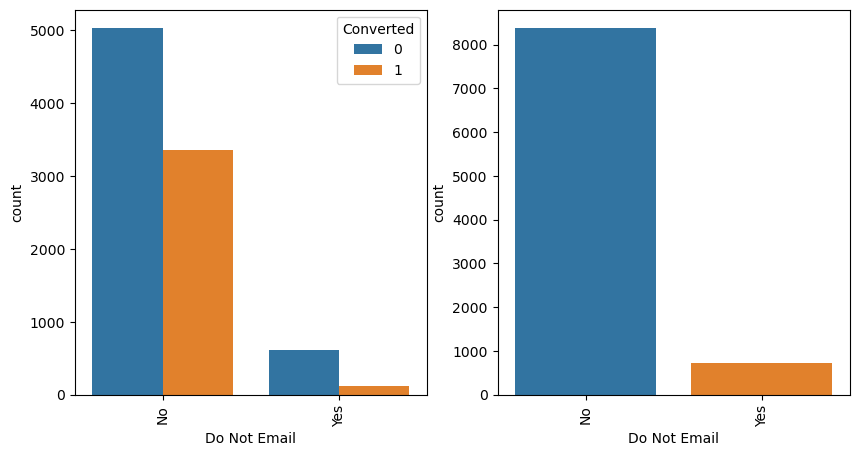

No     0.920466
Yes    0.079534
Name: Do Not Email, dtype: float64
No     8379
Yes     724
Name: Do Not Email, dtype: int64


In [101]:
coun('Do Not Email')

In [102]:
lead_data_1.nunique()

Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                                9
Specialization                              11
What is your current occupation              6
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

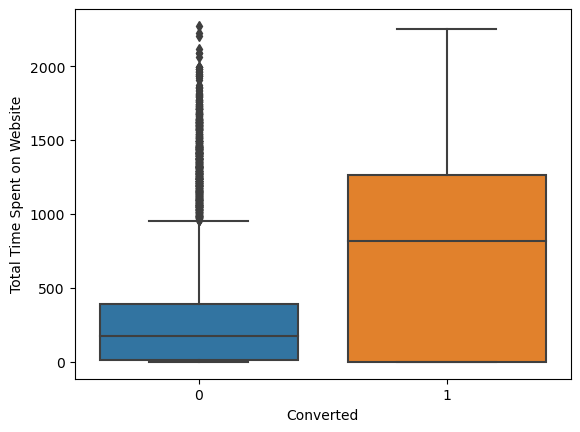

In [103]:
sns.boxplot(x=lead_data_1.Converted, y=lead_data_1['Total Time Spent on Website'])
plt.show()

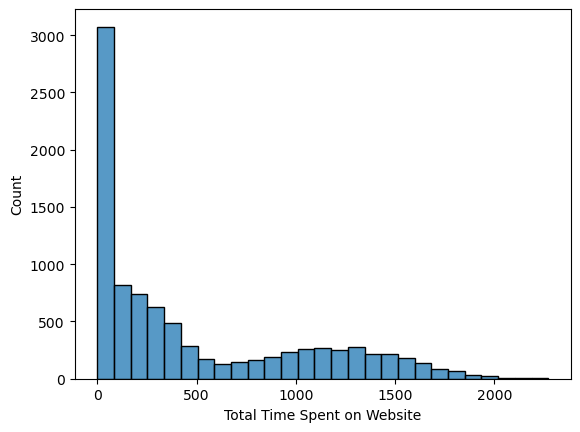

In [104]:
sns.histplot(lead_data_1['Total Time Spent on Website'])
plt.show()

### Leads spending more time on the website are more likely to be converted.


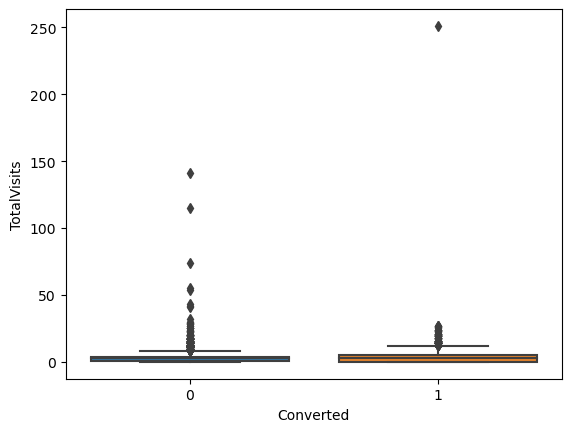

In [105]:
sns.boxplot(x=lead_data_1.Converted, y=lead_data_1['TotalVisits'])
plt.show()

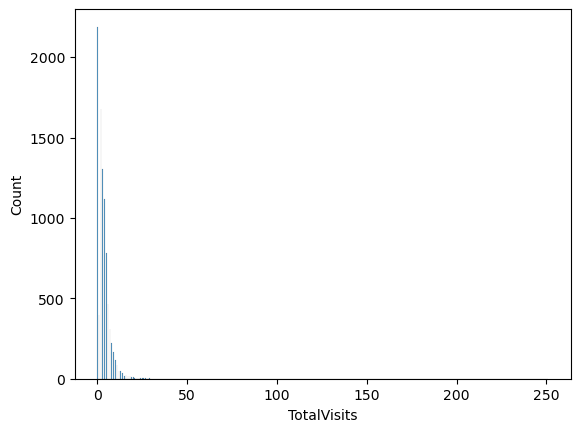

In [106]:
sns.histplot(lead_data_1['TotalVisits'])
plt.show()

### We cannot make any inference from Total Visits columns

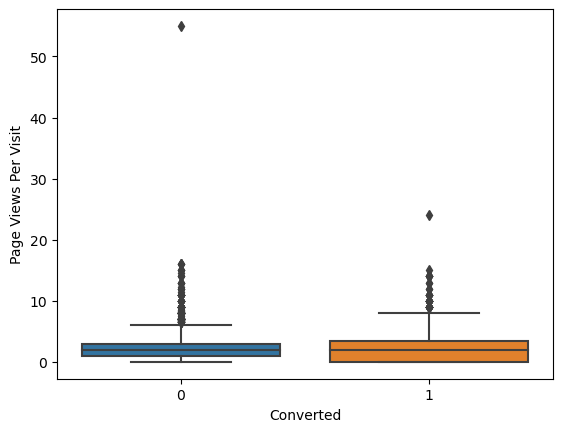

In [107]:
sns.boxplot(x=lead_data_1.Converted, y=lead_data_1['Page Views Per Visit'])
plt.show()

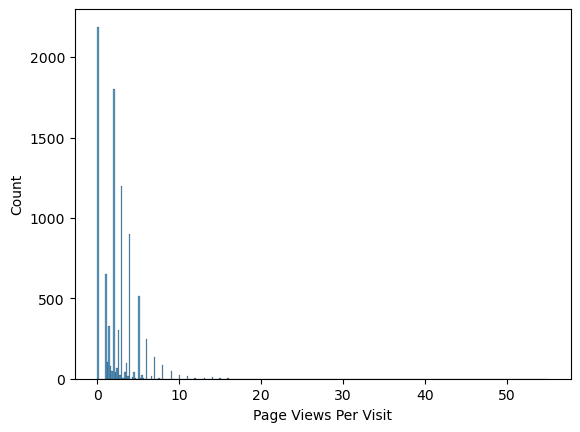

In [108]:
sns.histplot(lead_data_1['Page Views Per Visit'])
plt.show()

### We cannot make any inference from Total Visits columns

In [109]:
lead_data_1.nunique()

Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                                9
Specialization                              11
What is your current occupation              6
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

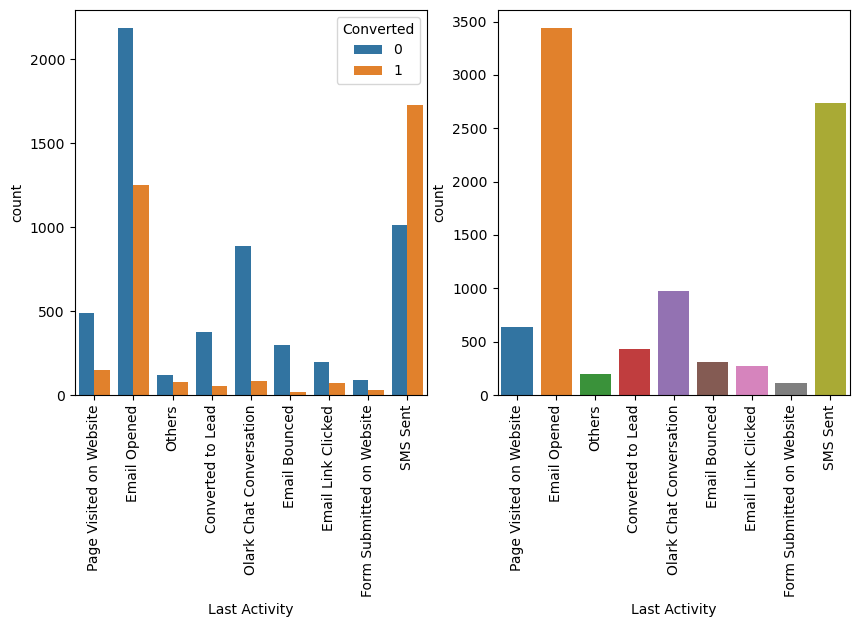

Email Opened                 0.377568
SMS Sent                     0.300780
Olark Chat Conversation      0.106778
Page Visited on Website      0.070306
Converted to Lead            0.047017
Email Bounced                0.034274
Email Link Clicked           0.029331
Others                       0.021202
Form Submitted on Website    0.012743
Name: Last Activity, dtype: float64
Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        193
Form Submitted on Website     116
Name: Last Activity, dtype: int64


In [110]:
coun('Last Activity')

## Most of the lead have their Email opened as their last activity.
## Conversion rate for leads with last activity as SMS Sent is almost 60%.

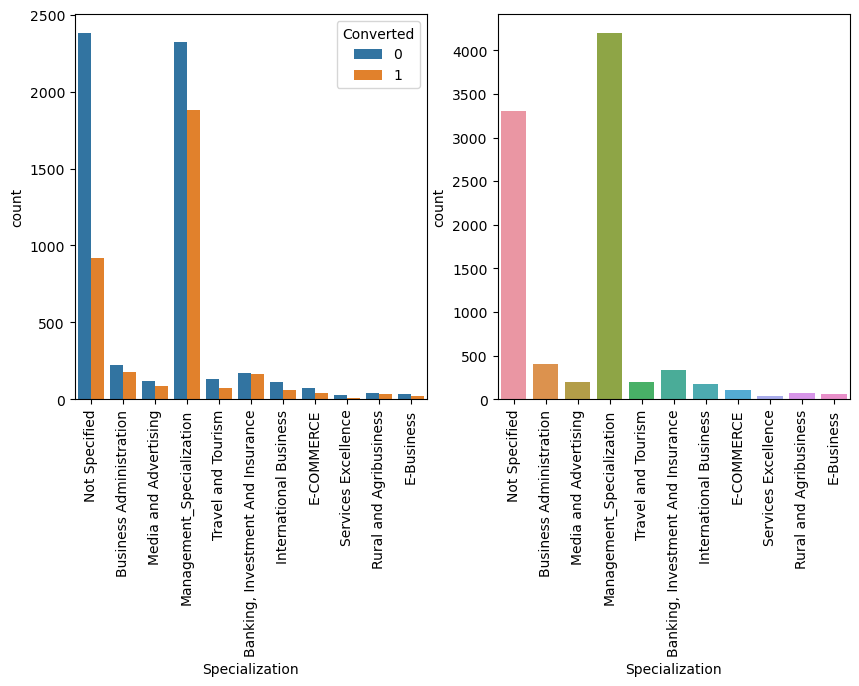

Management_Specialization            0.461826
Not Specified                        0.362957
Business Administration              0.043832
Banking, Investment And Insurance    0.036801
Media and Advertising                0.022190
Travel and Tourism                   0.022190
International Business               0.019334
E-COMMERCE                           0.012194
Rural and Agribusiness               0.008019
E-Business                           0.006262
Services Excellence                  0.004394
Name: Specialization, dtype: float64
Management_Specialization            4204
Not Specified                        3304
Business Administration               399
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
E-COMMERCE                            111
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                  

In [111]:
coun('Specialization')

## Group with Management Specilaization has high conversion rate, focus should be more these groups.

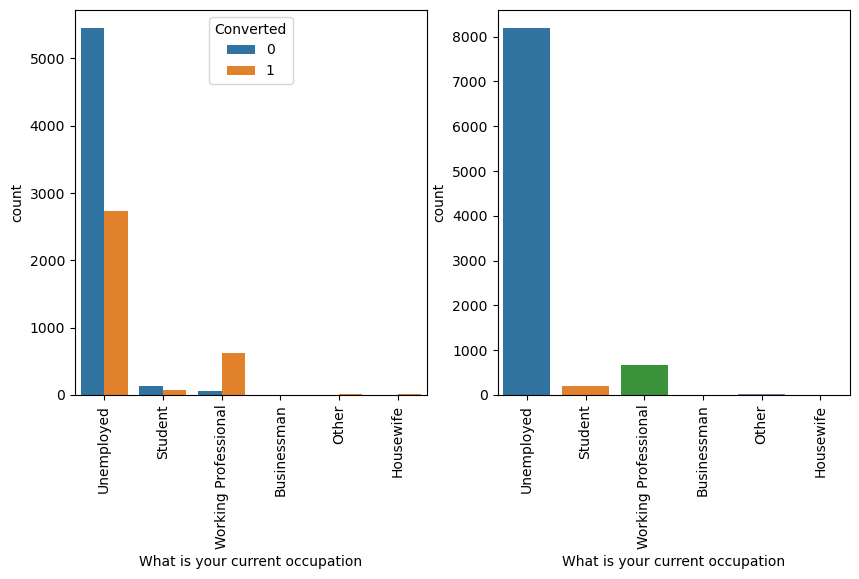

Unemployed              0.899154
Working Professional    0.074591
Student                 0.022740
Other                   0.001648
Housewife               0.000989
Businessman             0.000879
Name: What is your current occupation, dtype: float64
Unemployed              8185
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


In [112]:
coun('What is your current occupation')

### Working professional has high conversion rate. Most of them are unemployed.

### People who reacted with revert after reading mail has higher coversion. 

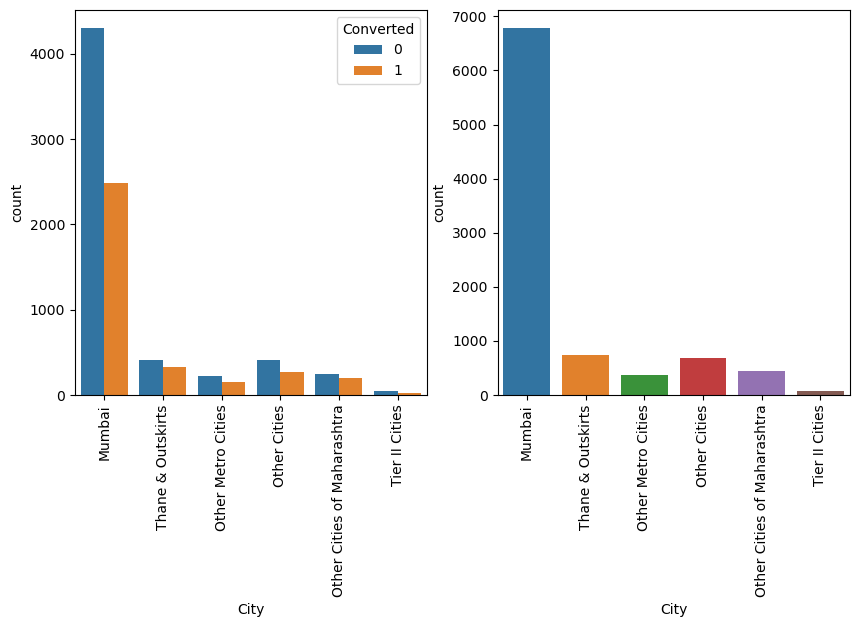

Mumbai                         0.744700
Thane & Outskirts              0.081951
Other Cities                   0.074701
Other Cities of Maharashtra    0.049105
Other Metro Cities             0.041415
Tier II Cities                 0.008129
Name: City, dtype: float64
Mumbai                         6779
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64


In [113]:
coun('City')

### Mumbai leads have high conversion rate and most people are from Mumbai.

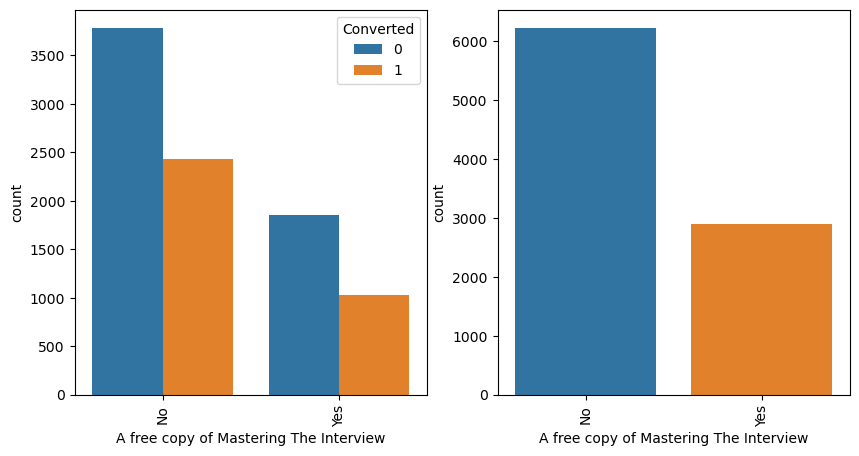

No     0.682742
Yes    0.317258
Name: A free copy of Mastering The Interview, dtype: float64
No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [114]:
coun('A free copy of Mastering The Interview')

### Most people do not need mastering copy interview. But still there is simlar percentage of conversion rate. 

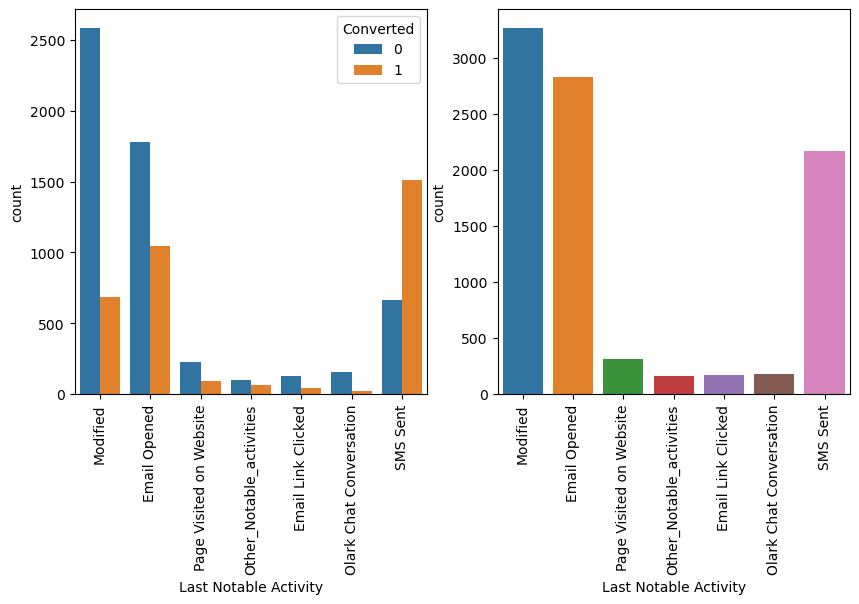

Modified                    0.359222
Email Opened                0.310557
SMS Sent                    0.238603
Page Visited on Website     0.034934
Olark Chat Conversation     0.020103
Email Link Clicked          0.019005
Other_Notable_activities    0.017577
Name: Last Notable Activity, dtype: float64
Modified                    3270
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Other_Notable_activities     160
Name: Last Notable Activity, dtype: int64


In [115]:
coun('Last Notable Activity')

### People to whom SMS is sent has more conversion Rate. 

In [116]:
lead_data_1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [117]:
lead_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  City                                    9103 non-null   obje

In [118]:
lead_data_1['Do Not Email']

0        No
1        No
2        No
3        No
4        No
       ... 
9235    Yes
9236     No
9237    Yes
9238     No
9239     No
Name: Do Not Email, Length: 9103, dtype: object

# Step - 3 Create Dummy Variables

In [119]:
lead_data_1.info()
lead_data_1.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  City                                    9103 non-null   obje

Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                                9
Specialization                              11
What is your current occupation              6
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

In [120]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

lead_data_1[varlist] = lead_data_1[varlist].apply(binary_map)

In [121]:
lead_data_1.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [122]:
lead_data_2=lead_data_1


In [123]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data_2[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_final_dum = pd.concat([lead_data_2, dummy1], axis=1)


In [124]:
lead_final_dum

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,1,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specialization,Unemployed,...,0,0,0,0,0,0,0,1,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,1
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,1,0,0,0,0,0,1
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specialization,Unemployed,...,1,0,0,0,0,0,0,0,0,1


In [125]:
lead_final_dum =lead_final_dum.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_final_dum

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.00,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.00,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1.0,305,1.00,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.00,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,0,0,2.0,238,2.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9237,1,0,2.0,199,2.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9238,0,1,3.0,499,3.00,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [126]:
lead_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 7   Lead Origin_Lead Import                               9103 non-null   uint8  
 8   Lead Source_Google                                    9103

# Step - 4 Test-Train Split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# Putting feature variable to X
X = lead_final_dum.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [129]:
# Putting response variable to y
y = lead_final_dum['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [130]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [131]:
# Import MinMax scaler
from sklearn.preprocessing import StandardScaler

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
num_cols


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [132]:
# Scale the three numeric features
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7962,-0.294015,-0.092900,1.476324,-0.394072,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5520,-0.294015,0.695064,-0.771066,2.111481,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1962,-0.294015,0.301082,-0.571257,0.061483,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1566,-0.294015,2.074000,1.393834,0.517039,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9170,-0.294015,-0.683873,-0.881052,-1.077404,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [133]:
### Checking the Conversion Rate
churn = (sum(lead_final_dum['Converted'])/len(lead_final_dum['Converted'].index))*100
churn

38.02043282434362

### There is conversion rate of 38 %

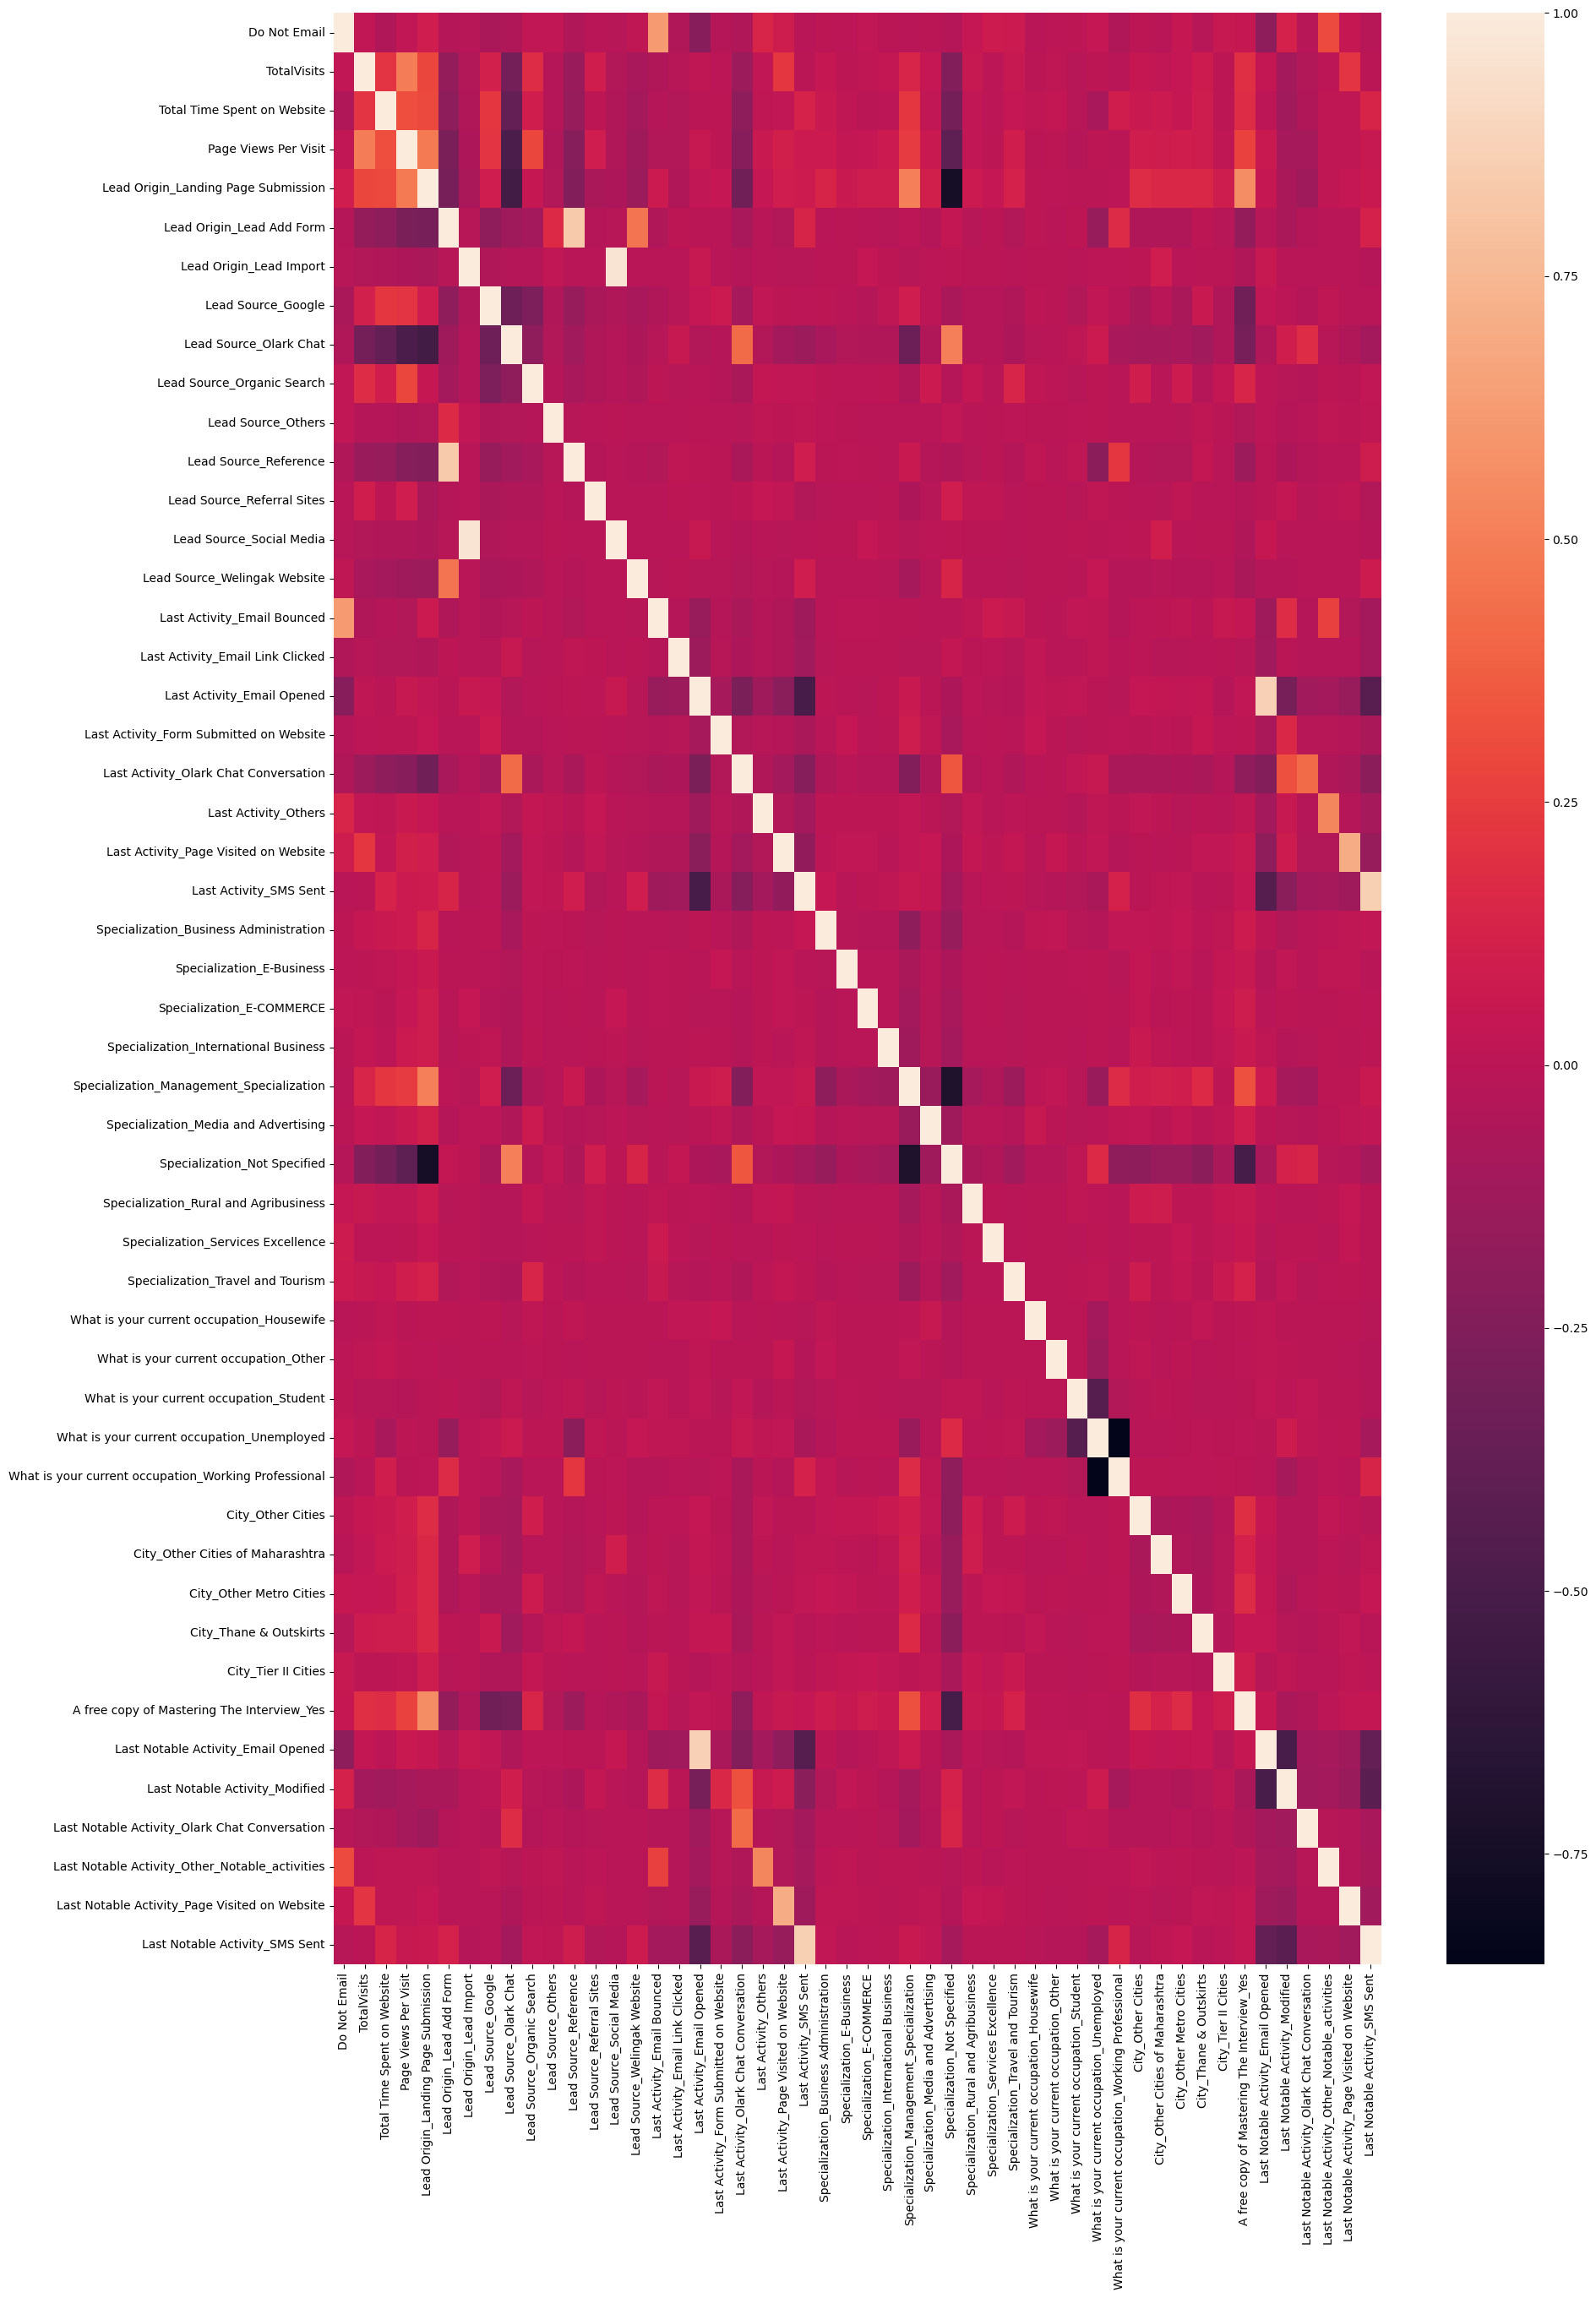

In [134]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

# Step - 5 Model Building using Stats Model and RFE

In [135]:
import statsmodels.api as sm

## Model Building using RFE

In [136]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [137]:
rfe.support_

array([False, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True])

In [138]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 10),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 36),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Admini

In [139]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Other_Notable_activities',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [140]:
col.shape

(15,)

In [141]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Mahara

## Model Building 1

In [142]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.7
Date:                Sat, 20 May 2023   Deviance:                       5299.4
Time:                        23:29:30   Pearson chi2:                 6.51e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8091      0.158    -11.470      0.000      -2.118      -1.500
Total Time Spent on Website                              1.0888      0.040     27.451      0.000       1.011       1.166
Lead Origin_Landing Page Submission                     -1.0606      0.126     -8.444      0.000      -1.307      -0.814
Lead Origin_Lead Add Form                                3.3389      0.235     14.203      0.000       2.878       3.800
Lead Source_Olark Chat                                   0.9438      0.120      7.833      0.000       0.708       1.180
Lead Source_Welingak Website                             2.3049      0.755      3.054      0.002       0.826       3.784
Last Activity_Email Link Clicked                         0.9603      0.238      4.041      0.000       0.495       1.426
Last Activity_Email Opened                               1.5563      0.122     12.786      0.000       1.318       1.795
Last Activity_Others                                     1.4892      0.273      5.460      0.000       0.955       2.024
Last Activity_Page Visited on Website                    0.9736      0.175      5.550      0.000       0.630       1.317
Last Activity_SMS Sent                                   1.5754      0.174      9.050      0.000       1.234       1.917
Specialization_Not Specified                            -1.0511      0.121     -8.684      0.000      -1.288      -0.814
What is your current occupation_Housewife               23.4609   1.53e+04      0.002      0.999      -3e+04       3e+04
What is your current occupation_Working Professional     2.7103      0.192     14.124      0.000       2.334       3.086
Last Notable Activity_Other_Notable_activities           0.6829      0.306      2.235      0.025       0.084       1.282
Last Notable Activity_SMS Sent                           1.3166      0.149      8.833      0.000       1.024       1.609
========================================================================================================================
"""

### P-values is high for "What is your current occupation_Housewife". we can drop this column.

In [143]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.22
14,Last Notable Activity_SMS Sent,5.07
1,Lead Origin_Landing Page Submission,2.86
6,Last Activity_Email Opened,2.30
10,Specialization_Not Specified,2.30
3,Lead Source_Olark Chat,1.89
2,Lead Origin_Lead Add Form,1.71
7,Last Activity_Others,1.46
13,Last Notable Activity_Other_Notable_activities,1.43
4,Lead Source_Welingak Website,1.35


###  VIF values seem to high for "What is your current occupation_HouseWife". We need to drop this column.

## Model Building 2

In [145]:
# Droping columns with High VIF

col = col.drop('What is your current occupation_Housewife', 1)

In [146]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.3
Date:                Sat, 20 May 2023   Deviance:                       5314.6
Time:                        23:29:30   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7970      0.157    -11.421      0.000      -2.105      -1.489
Total Time Spent on Website                              1.0878      0.040     27.469      0.000       1.010       1.165
Lead Origin_Landing Page Submission                     -1.0559      0.125     -8.421      0.000      -1.302      -0.810
Lead Origin_Lead Add Form                                3.3445      0.235     14.233      0.000       2.884       3.805
Lead Source_Olark Chat                                   0.9409      0.120      7.816      0.000       0.705       1.177
Lead Source_Welingak Website                             2.2985      0.755      3.046      0.002       0.820       3.777
Last Activity_Email Link Clicked                         0.9564      0.237      4.042      0.000       0.493       1.420
Last Activity_Email Opened                               1.5510      0.121     12.787      0.000       1.313       1.789
Last Activity_Others                                     1.4780      0.272      5.425      0.000       0.944       2.012
Last Activity_Page Visited on Website                    0.9600      0.175      5.481      0.000       0.617       1.303
Last Activity_SMS Sent                                   1.5618      0.174      8.987      0.000       1.221       1.902
Specialization_Not Specified                            -1.0546      0.121     -8.724      0.000      -1.292      -0.818
What is your current occupation_Working Professional     2.7022      0.192     14.090      0.000       2.326       3.078
Last Notable Activity_Other_Notable_activities           0.6778      0.305      2.221      0.026       0.080       1.276
Last Notable Activity_SMS Sent                           1.3166      0.149      8.835      0.000       1.025       1.609
========================================================================================================================
"""

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.22
13,Last Notable Activity_SMS Sent,5.07
1,Lead Origin_Landing Page Submission,2.86
6,Last Activity_Email Opened,2.30
10,Specialization_Not Specified,2.30
3,Lead Source_Olark Chat,1.89
2,Lead Origin_Lead Add Form,1.71
7,Last Activity_Others,1.46
12,Last Notable Activity_Other_Notable_activities,1.43
4,Lead Source_Welingak Website,1.35


# Model Building 3

In [148]:
# Droping columns with High VIF

col = col.drop('Last Notable Activity_SMS Sent', 1)

In [149]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.9
Date:                Sat, 20 May 2023   Deviance:                       5397.7
Time:                        23:29:31   Pearson chi2:                 6.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3816
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8233      0.157    -11.624      0.000      -2.131      -1.516
Total Time Spent on Website                              1.0915      0.039     27.754      0.000       1.014       1.169
Lead Origin_Landing Page Submission                     -1.0377      0.124     -8.342      0.000      -1.282      -0.794
Lead Origin_Lead Add Form                                3.3406      0.234     14.295      0.000       2.883       3.799
Lead Source_Olark Chat                                   0.9823      0.119      8.225      0.000       0.748       1.216
Lead Source_Welingak Website                             2.2396      0.754      2.969      0.003       0.761       3.718
Last Activity_Email Link Clicked                         0.9594      0.236      4.058      0.000       0.496       1.423
Last Activity_Email Opened                               1.5563      0.121     12.831      0.000       1.319       1.794
Last Activity_Others                                     1.4844      0.273      5.446      0.000       0.950       2.019
Last Activity_Page Visited on Website                    0.9667      0.175      5.517      0.000       0.623       1.310
Last Activity_SMS Sent                                   2.6168      0.125     20.946      0.000       2.372       2.862
Specialization_Not Specified                            -1.0490      0.120     -8.755      0.000      -1.284      -0.814
What is your current occupation_Working Professional     2.7233      0.191     14.270      0.000       2.349       3.097
Last Notable Activity_Other_Notable_activities           0.6792      0.305      2.224      0.026       0.081       1.278
========================================================================================================================
"""

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.86
6,Last Activity_Email Opened,2.30
10,Specialization_Not Specified,2.30
9,Last Activity_SMS Sent,2.26
3,Lead Source_Olark Chat,1.89
2,Lead Origin_Lead Add Form,1.71
7,Last Activity_Others,1.46
12,Last Notable Activity_Other_Notable_activities,1.43
4,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.29


### So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

# Step -6 Predicting Y

In [151]:
# Getting the predicted values on the train set for Model 3
y_train_pred = res3.predict(X_train_sm)
y_train_pred[:10]

7962    0.796931
5520    0.104675
1962    0.128219
1566    0.949793
9170    0.214945
5097    0.214945
8954    0.393743
309     0.149295
5519    0.441533
1050    0.478167
dtype: float64

In [152]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.79693056, 0.10467456, 0.12821851, 0.94979279, 0.21494541,
       0.21494541, 0.3937431 , 0.14929452, 0.44153291, 0.47816709])

In [153]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.796931,7962
1,0,0.104675,5520
2,0,0.128219,1962
3,1,0.949793,1566
4,0,0.214945,9170


In [154]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.796931,7962,1
1,0,0.104675,5520,0
2,0,0.128219,1962,0
3,1,0.949793,1566,1
4,0,0.214945,9170,0


# Step 7 Model Evaluation

In [155]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3553  400]
 [ 814 1605]]


In [156]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8094789704959197


### Model Accuracy is coming around 81%, which is very good model.

In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6634973129392311

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.8988110295977738

In [160]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10118897040222616


In [161]:
# positive predictive value 
print (TP / float(TP+FP))

0.800498753117207


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8136020151133502


### With current model and cutoff of 0.5 we have around 80% accuracy, sensitivity of around 66% and specificity of around 90%.

# Step  9 Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

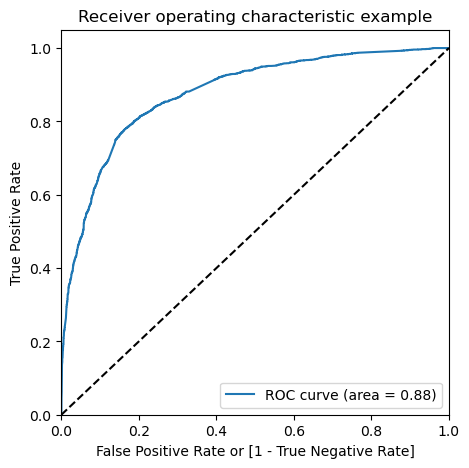

In [165]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### The ROC Curve should be a value close to 1. We are getting a good value of 0.88 indicating a good predictive model.

# Step 10 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [166]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.796931,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.104675,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.128219,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.949793,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.214945,9170,0,1,1,1,0,0,0,0,0,0,0


In [167]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.579253  0.970649  0.339742
0.2   0.2  0.717671  0.920215  0.593726
0.3   0.3  0.792059  0.829268  0.769289
0.4   0.4  0.816541  0.768913  0.845687
0.5   0.5  0.809479  0.663497  0.898811
0.6   0.6  0.797081  0.594047  0.921326
0.7   0.7  0.775110  0.497726  0.944852
0.8   0.8  0.753296  0.398512  0.970402
0.9   0.9  0.703704  0.232741  0.991905


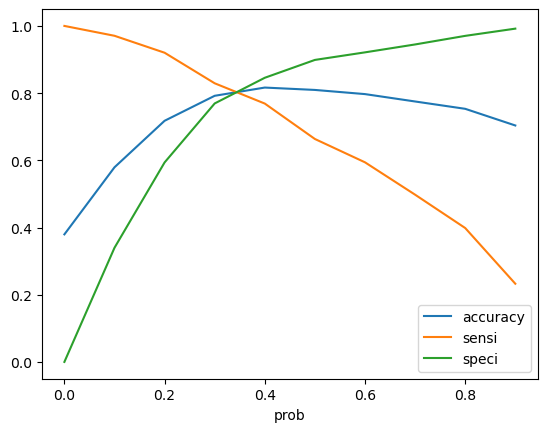

In [168]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the graph it is visible that optimal cuttof is at 0.34

In [169]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.796931,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.104675,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.128219,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.949793,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.214945,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [170]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8061833019460138


In [171]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print(confusion2)

[[3193  760]
 [ 475 1944]]


In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8036378668871434

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.8077409562357702

In [175]:
# Calculate false postive rate - predicting when customer does not get lead
print(FP/ float(TN+FP))

0.1922590437642297


In [176]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7189349112426036


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8705016357688113


<font color= green>___With the current cut off as 0.34 we have accuracy, sensitivity and specificity of around 80%.And Model overall accuracy is about 80%.___</font>

## Precision and Recall

In [178]:
#Looking at the confusion matrix again

In [179]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print(confusion)

[[3193  760]
 [ 475 1944]]


In [180]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7189349112426036

In [181]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8036378668871434

In [182]:
from sklearn.metrics import precision_score, recall_score

In [183]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7189349112426036

In [184]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8036378668871434

In [185]:
from sklearn.metrics import precision_recall_curve

In [186]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

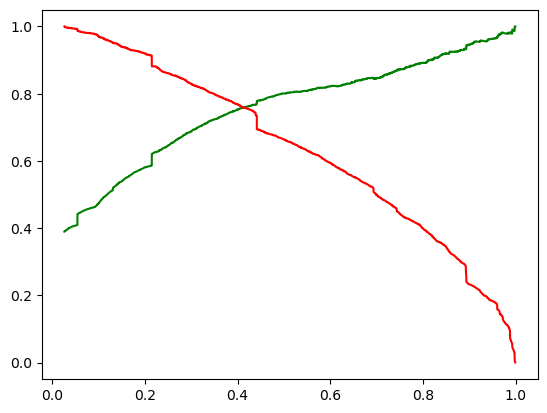

In [187]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11 Prediction opf Test Data

In [188]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3504,-0.294015,-0.092900,-0.103815,0.289261,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4050,-0.294015,-0.683873,-0.881052,-1.077404,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7201,3.401183,-0.289891,0.424120,-0.166294,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1196,-0.294015,0.104091,-0.105648,0.744816,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
8219,-0.294015,0.695064,-0.428274,-0.280183,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [189]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Other_Notable_activities
3504,-0.103815,1,0,0,0,0,1,0,0,0,0,0,0
4050,-0.881052,0,1,0,0,0,0,0,0,1,0,0,0
7201,0.424120,1,0,0,0,0,0,0,0,1,0,0,0
1196,-0.105648,1,0,0,0,0,1,0,0,0,0,0,0
8219,-0.428274,1,0,0,0,0,0,0,1,0,0,0,0


In [190]:
X_test_sm = sm.add_constant(X_test)

In [191]:
y_test_pred = res3.predict(X_test_sm)

In [192]:
y_test_pred[:10]

3504    0.194976
4050    0.959780
7201    0.554456
1196    0.194662
8219    0.086135
8747    0.214945
9048    0.767083
6524    0.029928
7693    0.286626
8187    0.893152
dtype: float64

In [193]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [194]:
# Let's see the head
y_pred_1.head()

,0
3504,0.194976
4050,0.959780
7201,0.554456
1196,0.194662
8219,0.086135


In [195]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [196]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [197]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [198]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [199]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.194976
1,1,4050,0.959780
2,0,7201,0.554456
3,0,1196,0.194662
4,1,8219,0.086135


In [200]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [201]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.194976
1,1,4050,0.959780
2,0,7201,0.554456
3,0,1196,0.194662
4,1,8219,0.086135


In [202]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [203]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.194976,19
1,4050,1,0.959780,96
2,7201,0,0.554456,55
3,1196,0,0.194662,19
4,8219,1,0.086135,9


In [204]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [205]:
y_pred_final

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.194976,19,0
1,4050,1,0.959780,96,1
2,7201,0,0.554456,55,1
3,1196,0,0.194662,19,0
4,8219,1,0.086135,9,0
...,...,...,...,...,...
2726,6508,0,0.257712,26,0
2727,315,0,0.104306,10,0
2728,3766,0,0.113017,11,0
2729,8043,1,0.952712,95,1


In [206]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7960454046136947

In [207]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1498,  191],
       [ 366,  676]], dtype=int64)

In [208]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [209]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8036378668871434

In [210]:
# Let us calculate specificity
TN / float(TN+FP)

0.8077409562357702

In [211]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7797001153402537

In [212]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6487523992322457

## Final Observation:
### Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 80% ; Sensitivity : 80% ; Specificity : 80%


Test Data: 
Accuracy : 80% ; Sensitivity : 80% ; Specificity : 80%

In [213]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
1,4050,1,0.959780,96,1
9,8187,0,0.893152,89,1
23,7005,1,0.992118,99,1
43,1991,1,0.853474,85,1
46,5353,1,0.873413,87,1
...,...,...,...,...,...
2717,6163,1,0.917120,92,1
2718,1467,1,0.964641,96,1
2719,4781,1,0.997256,100,1
2729,8043,1,0.952712,95,1


## The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [214]:
res3.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.340600
What is your current occupation_Working Professional    2.723333
Last Activity_SMS Sent                                  2.616758
Lead Source_Welingak Website                            2.239565
Last Activity_Email Opened                              1.556332
Last Activity_Others                                    1.484380
Total Time Spent on Website                             1.091544
Lead Source_Olark Chat                                  0.982310
Last Activity_Page Visited on Website                   0.966727
Last Activity_Email Link Clicked                        0.959408
Last Notable Activity_Other_Notable_activities          0.679210
Lead Origin_Landing Page Submission                    -1.037705
Specialization_Not Specified                           -1.048998
const                                                  -1.823306
dtype: float64

### The company should make calls to working professional, whose last activity was SMS sent, Origin is Add Form, who spent more time on websites, who use welingak website.

### Company should not make calls to people with lead origin as landing page, who did not mention specialization, who say do not email as 'yes'.